# Hybrid Mutual Fund Analysis (EDA project)


### Aim:
  Analyse various parameters related to the Hybrid Mutual fund dataset and find distinction between good and bad schemes.

A hybrid fund is an investment fund that is characterized by diversification among two or more asset classes. These funds typically invest in a mix of stocks and bonds. The term hybrid indicates that the fund strategy includes investment in multiple asset classes. These funds offer investors an option for investing in multiple asset classes through a single fund. These funds can offer varying levels of risk tolerance ranging from conservative to moderate and aggressive.

In [1]:
import pandas as pd              #for data manipulation and analysis
import matplotlib.pyplot as plt  
import numpy as np   # # Used to perform mathematical and logical operations on arrays can be performed.
import seaborn as sb #Python data visualization library based on matplotlib,it provides informative statistical graphs.

%matplotlib inline
#magic function in ipython that renders the figure in a notebook

In [2]:
data=pd.read_excel("HMF.xlsx")  #loading the hybrid mutual fund data

In [3]:
data.head()   # first five rows of the data

Unnamed: 0  Sl_No.                         Fund_Scheme_Name       Category  \
0           0       1                     UTI Arbitrage Fund #      Arbitrage   
1           1       2                LIC MF Debt Hybrid Fund #  Conservative    
2           2       3  ICICI Prudential Regular Savings Fund #  Conservative    
3           3       4                Reliance Arbitrage Fund #      Arbitrage   
4           4       5            Kotak Equity Arbitrage Fund #      Arbitrage   

  Launch_Date Crisil_Rating  Net_Assets_(Cr)  1_Yr_Return  3_Yr_Return  \
0  2006-06-29        Rank 1          1397.70         6.52         6.24   
1  2003-06-02        Rank 1            84.93         7.68         5.92   
2  2004-03-30        Rank 1          1589.42         8.40         9.33   
3  2010-10-14        Rank 2          8535.00         6.64         6.41   
4  2005-09-29        Rank 2         13360.00         6.56         6.32   

   5_Yr_Return  ... Expense_Ratio  Sharpe_Ratio  Sortino_Ratio  Alpha  Beta  \
0         6.60  ...          0.83         -0.03          -0.04   0.60  0.33   
1         6.55  ...          2.30         -0.08          -0.12  -1.91  0.58   
2         9.92  ...          2.24          0.84           1.36   1.91  1.58   
3         6.86  ...          1.04          0.26           0.45   0.70  1.30   
4         6.75  ...          0.97          0.14           0.23   0.56  1.26   

   Std_Dev  R_Squared  Year_Trailing  Net_Return  Good  
0     0.45       0.00             13        7.40     0  
1     3.07      62.19             16        7.73     0  
2     3.57      88.45             15       10.06     1  
3     0.54      85.00              8       17.83     1  
4     0.45      87.45             13       18.45     1  

[5 rows x 21 columns]

In [4]:
data.describe() # generates descriptive statistics that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution.It analyzes both numeric and object series.

Unnamed: 0     Sl_No.  Net_Assets_(Cr)  1_Yr_Return  3_Yr_Return  \
count   30.000000  30.000000        30.000000    30.000000    30.000000   
mean    14.500000  15.500000      4523.254637     7.257000     7.685000   
std      8.803408   8.803408      7952.466690     1.567997     1.924327   
min      0.000000   1.000000        12.230700     4.830000     5.740000   
25%      7.250000   8.250000       113.197500     6.127500     6.217500   
50%     14.500000  15.500000      1488.350000     6.965000     6.860000   
75%     21.750000  22.750000      4350.500000     8.385000     8.720000   
max     29.000000  30.000000     30028.000000    10.610000    11.460000   

       5_Yr_Return  Expense_Ratio  Sharpe_Ratio  Sortino_Ratio      Alpha  \
count    30.000000      30.000000     30.000000      30.000000  30.000000   
mean      8.346333       1.718333      0.165000       0.263000   0.331333   
std       1.832329       0.575243      0.362717       0.612063   1.568361   
min       6.250000       0.750000     -0.670000      -1.180000  -2.450000   
25%       6.667500       1.017500     -0.007500      -0.010000  -1.082500   
50%       7.935000       1.855000      0.240000       0.380000   0.580000   
75%       9.470000       2.197500      0.327500       0.550000   1.360000   
max      12.000000       2.400000      0.840000       1.360000   3.980000   

            Beta    Std_Dev  R_Squared  Year_Trailing  Net_Return       Good  
count  30.000000  30.000000  30.000000      30.000000   30.000000  30.000000  
mean    1.437667   4.792667  61.608333      15.266667   11.528333   0.466667  
std     1.217682   3.690865  38.442155       4.961461    4.102575   0.507416  
min    -0.690000   0.440000   0.000000       5.000000    6.650000   0.000000  
25%     0.587500   0.587500  32.210000      12.250000    7.512500   0.000000  
50%     0.995000   4.050000  85.050000      15.000000   10.225000   0.000000  
75%     2.310000   8.495000  89.907500      18.750000   14.357500   1.000000  
max     3.920000  11.740000  96.810000      26.000000   19.860000   1.000000

In [5]:
data.info() #prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        30 non-null     int64         
 1   Sl_No.            30 non-null     int64         
 2   Fund_Scheme_Name  30 non-null     object        
 3   Category          30 non-null     object        
 4   Launch_Date       30 non-null     datetime64[ns]
 5   Crisil_Rating     30 non-null     object        
 6   Net_Assets_(Cr)   30 non-null     float64       
 7   1_Yr_Return       30 non-null     float64       
 8   3_Yr_Return       30 non-null     float64       
 9   5_Yr_Return       30 non-null     float64       
 10  Risk              30 non-null     object        
 11  Expense_Ratio     30 non-null     float64       
 12  Sharpe_Ratio      30 non-null     float64       
 13  Sortino_Ratio     30 non-null     float64       
 14  Alpha             30 non-nul

### Skewness:
     skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined.
     
##### Negative skew
commonly indicates that the tail is on the left side of the distribution; the mass of the distribution is concentrated on the right of the figure

##### Positive skew 
indicates that the tail is on the right; the mass of the distribution is concentrated on the left of the figure.

##### A zero value 
means that the tails on both sides of the mean balance out overall; this is the case for a symmetric distribution, 

In [7]:
data.skew()

Unnamed: 0         0.000000
Sl_No.             0.000000
Net_Assets_(Cr)    2.320185
1_Yr_Return        0.596719
3_Yr_Return        0.983600
5_Yr_Return        0.756581
Expense_Ratio     -0.579551
Sharpe_Ratio      -0.574800
Sortino_Ratio     -0.583262
Alpha             -0.014383
Beta               0.657854
Std_Dev            0.285394
R_Squared         -0.832263
Year_Trailing     -0.137841
Net_Return         0.463050
Good               0.140769
dtype: float64

### 1-3-5 Year returns:
     Return' is the yield that an investment generates over a period of time. It is the percentage increase or decrease in the value of the investment in that period.

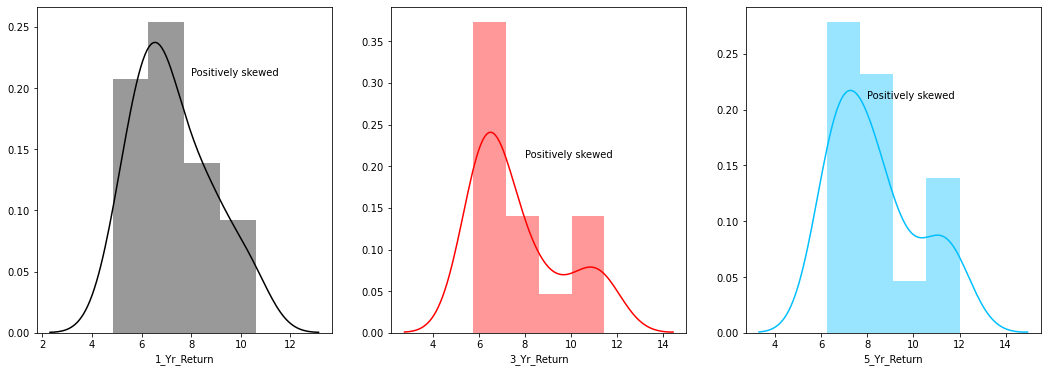

In [8]:
# Plotting graphs for 1 year return,3 year return and 5 year return
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sb.distplot(data['1_Yr_Return'], ax=ax[0], color='black')
ax[0].text(8.0,0.21,"Positively skewed")

sb.distplot(data['3_Yr_Return'], ax=ax[1], color='red')
ax[1].text(8.0,0.21,"Positively skewed")

sb.distplot(data['5_Yr_Return'], ax=ax[2], color='deepskyblue')
ax[2].text(8.0,0.21,"Positively skewed")

plt.rcParams['font.size'] = 12  # setting font size

###  Expense ratio:
       The expense ratio of a stock or asset fund is the total percentage of fund assets used for administrative, management, advertising, and all other expenses.
       
### Sharpe ratio:
        The Sharpe ratio is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
        
### Sortino ratio:
        It measures the risk-adjusted returns of a given scheme. The Sortino ratio is the excess return over the risk-free rate divided by the asset's downside deviation, and so it measures the return to "bad" volatility. The Sortino ratio is a variation of the Sharpe ratio that differentiates harmful volatility from total overall volatility by using the asset's standard deviation of negative portfolio returns, called downside deviation, instead of the total standard deviation of portfolio returns.

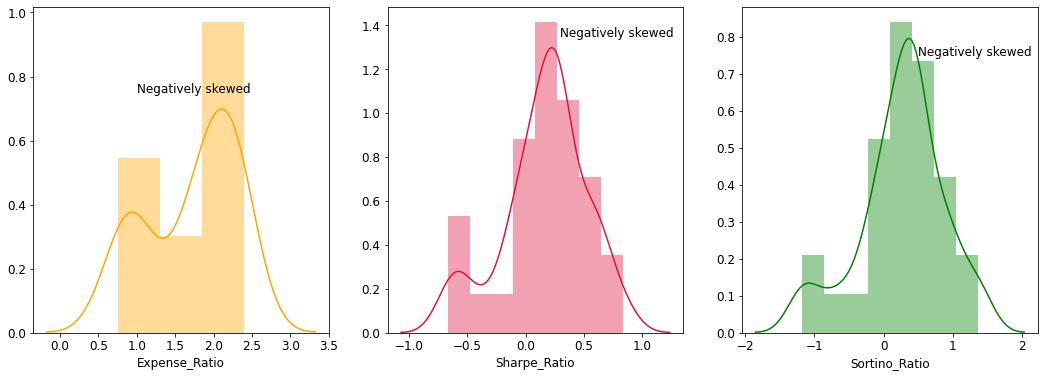

In [9]:
# Plotting graphs for Expense ratio,sharp_ratio and sortino ratio
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sb.distplot(data['Expense_Ratio'], ax=ax[0], color='orange')
ax[0].text(1.0,0.75,"Negatively skewed")

sb.distplot(data['Sharpe_Ratio'], ax=ax[1], color='crimson')
ax[1].text(0.3,1.35,"Negatively skewed")

sb.distplot(data['Sortino_Ratio'], ax=ax[2], color='green')
ax[2].text(0.5,0.75,"Negatively skewed")

plt.rcParams['font.size'] = 12

### Alpha:
       Alpha tells you whether that fund has produced returns justifying the risks it is taking by comparing its actual return to the one 'predicted' by the beta.
       
### Beta:
       Beta is a measure of a stock's volatility in relation to the market. By definition, the market has a beta of 1.0, and individual stocks are ranked according to how much they deviate from the market. A stock that swings more than the market over time has a beta above 1.0. If a stock moves less than the market, the stock's beta is less than 1.0. High-beta stocks are supposed to be riskier but provide a potential for higher returns; low-beta stocks pose less risk but also lower returns.
       
### Standard Deviation:
     Standard deviation is a statistical measurement that shows how much variation there is from the arithmetic mean (simple average). A greater standard deviation indicates higher volatility, which means the mutual fund's performance fluctuated high above the average but also significantly below it.
     
### R-squared
     R-squared measures how closely each change in the price of an asset is correlated to a benchmark. Beta measures how large those price changes are in relation to a benchmark. Used together, R-squared and beta give investors a thorough picture of the performance of asset managers.

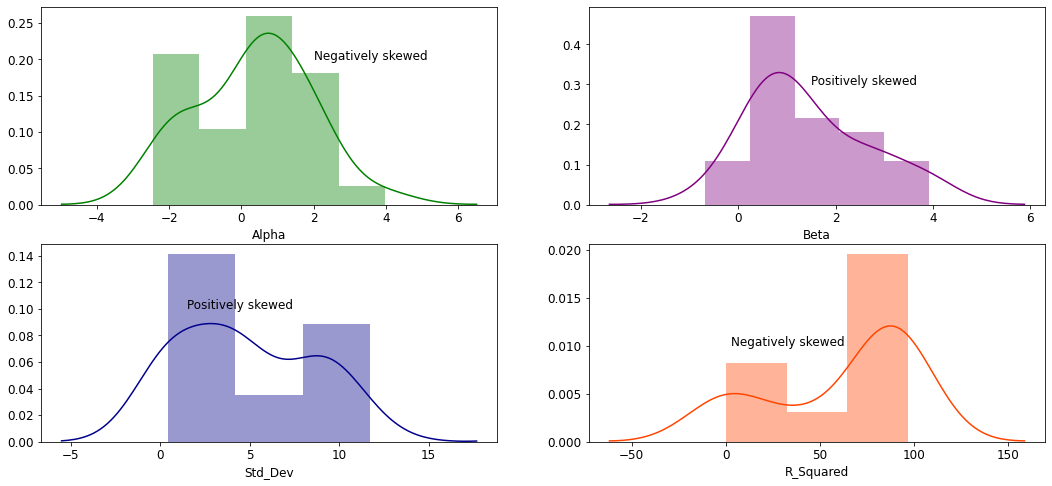

In [12]:
# Plotting graphs for alpha,beta std-dev and R-squared values
fig, ax = plt.subplots(2, 2, figsize=(18, 8))
sb.distplot(data['Alpha'], ax=ax[0,0], color='green')
ax[0,0].text(2.0,0.20,"Negatively skewed")

sb.distplot(data['Beta'], ax=ax[0,1], color='purple')
ax[0,1].text(1.5,0.30,"Positively skewed")

sb.distplot(data['Std_Dev'], ax=ax[1,0], color='darkblue')
ax[1,0].text(1.5,0.10,"Positively skewed")

sb.distplot(data['R_Squared'], ax=ax[1,1], color='orangered')
ax[1,1].text(2.5,0.01,"Negatively skewed")

plt.rcParams['font.size'] = 12

### Kurtosis:
    Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.
    For kurtosis, the general guideline is that if the number is greater than +1, the distribution is too peaked. Likewise, a kurtosis of less than –1 indicates a distribution that is too flat.

In [13]:
data.kurt()   #returns kurtosis

Unnamed: 0        -1.200000
Sl_No.            -1.200000
Net_Assets_(Cr)    4.586372
1_Yr_Return       -0.449587
3_Yr_Return       -0.510389
5_Yr_Return       -0.744381
Expense_Ratio     -1.316102
Sharpe_Ratio       0.334920
Sortino_Ratio      0.613696
Alpha             -0.337668
Beta              -0.348688
Std_Dev           -1.298537
R_Squared         -1.111728
Year_Trailing      0.109243
Net_Return        -1.097737
Good              -2.126913
dtype: float64

In [14]:
X=data['Fund_Scheme_Name']  #initializing Fund_scheme_Name to X
Y=data['Category']          #and Category to Y
X.head()

0                       UTI Arbitrage Fund #
1                  LIC MF Debt Hybrid Fund #
2    ICICI Prudential Regular Savings Fund #
3                  Reliance Arbitrage Fund #
4              Kotak Equity Arbitrage Fund #
Name: Fund_Scheme_Name, dtype: object

In [15]:
Y.head()

0        Arbitrage
1    Conservative 
2    Conservative 
3        Arbitrage
4        Arbitrage
Name: Category, dtype: object

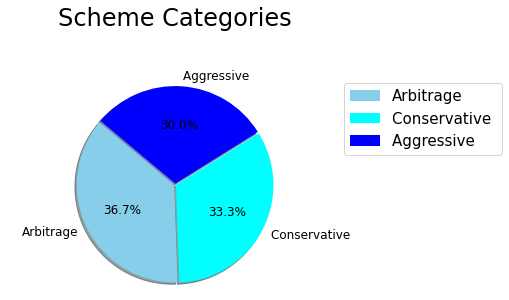

In [16]:
category=data['Category'].unique().tolist() # It returns list of items that are unique in the column "Category"
#print(category)
category_frequency = data['Category'].value_counts().to_dict() # It returns the count of each unique item in the form of dictionary
#print(category_frequency)
count = category_frequency.values() # It returns the "values" in key:value (unique item : frequency) pair of dictionary obtained in last line.
#print(count)

# function to return list of categories
def getList(category_frequency): 
    list = [] 
    for value in category_frequency.values(): 
        list.append(value) 
          
    return list
      
category_count=getList(category_frequency) #This is to return list of values obtained in the dictionary.

#print(category_count)

#labels = ['Arbitrage', 'Aggressive', 'Conservative']
colors = ['skyblue', 'cyan', 'blue']
explode = (0.01, 0.01, 0.01)  


# Plottting pie chart for categories
plt.pie(category_count, explode=explode, labels=category, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%')
plt.title('Scheme Categories', y=1.20, fontsize='24')
plt.legend(category,loc='upper right', bbox_to_anchor=(1.50,1.0), fontsize=15)
plt.axis('equal')
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.size'] = 12
plt.show()

#### ->It shows that out of my 30 hybrid fund schemes 30% are Aggressive, 33.3 % are Conservative and 36.7% are Arbitrage.

### Arbitrage:
     Arbitrage funds are for investors who want to profit from volatile markets without taking on too much risk. They are low risk funds where each security is bought and sold simultaneously and there is virtually none of the risk involved with longer-term investments. Arbitrage funds are not very profitable during stable markets. These are beneficial when the market is highly volatile.
     
### Conservative: 
    The conservative hybrid schemes are mandated to invest 10 to 25 per cent of their total assets in equity and equity-related instruments. The rest (75 per cent to 90 per cent) of the corpus will be invested in debt instruments. The little exposure to equity helps these schemes to earn little extra returns than pure debt funds. This also makes these schemes riskier than the pure debt funds.
    
### Aggressive:
      Aggressive Hybrid Funds will invest 65% to 80% of total assets in equities and 20% to 35% in debt instruments. These schemes are treated as equity schemes for the purpose of taxation. Aggressive growth funds seek to provide above average market returns and are more promising of the lot.

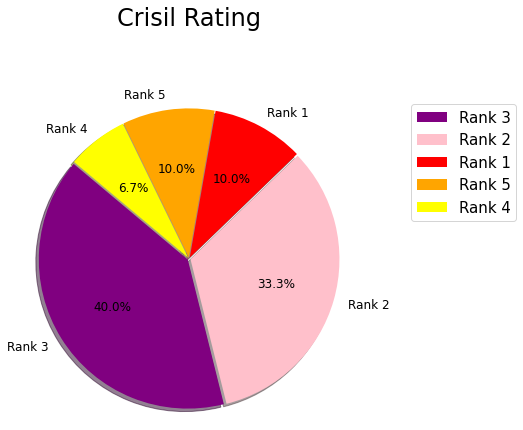

In [19]:
rank=data['Crisil_Rating'].unique().tolist() #It returns list of items that are unique in the column "Crisil_Rating"
#print(rank)
rank_frequency = data['Crisil_Rating'].value_counts().to_dict() #It returns the count of each unique item in the form of dictionary
#print(rank_frequency)
count = rank_frequency.values() #It returns the "values" in key:value (unique item : frequency) pair of dictionary obtained in last line.
#print(count)

# function returns the list of rank_frequency
def getList(rank_frequency): 
    list = [] 
    for value in rank_frequency.values(): 
        list.append(value) 
          
    return list
      
rank_count=getList(rank_frequency) #This is to return list of values obtained in the dictionary.

#print(rank_count)

labels = ['Rank 3', 'Rank 2', 'Rank 1', 'Rank 5', 'Rank 4']
colors = ['purple','pink','red', 'orange', 'yellow']
explode = (0.01, 0.01, 0.01, 0.01, 0.01)  

# plot pie chart for crisil data
plt.pie(rank_count, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%')
plt.title('Crisil Rating', y=1.20, fontsize='24')
plt.axis('equal')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize']=(6,6)
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.50,1.0), fontsize=15)
plt.show()

### Crisil Rating:
        Crisil rating is based on global best practices which uses a combination of NAV and portfolio-based attributes for evaluation. This provides a single point analysis of mutual funds, taking into consideration key parameters such as risk-adjusted returns, asset concentration, liquidity and asset quality.
        
#### ->This pie chart shows that out of my 30 schemes, funds having rank 1 are 10%, of rank 2 are 33.3%, of rank 3 are 40%, of rank 4 are 6.7% and of rank 5 are 10%.

    Rank 1 being the highest and rank 5 being the lowest, Rank or Crisil rating is based on global best practices which uses a combination of NAV and portfolio-based attributes for evaluation. This provides a single point analysis of mutual funds, taking into consideration key parameters such as risk-adjusted returns, asset concentration, liquidity and asset quality.

### 1 YEAR RETURN

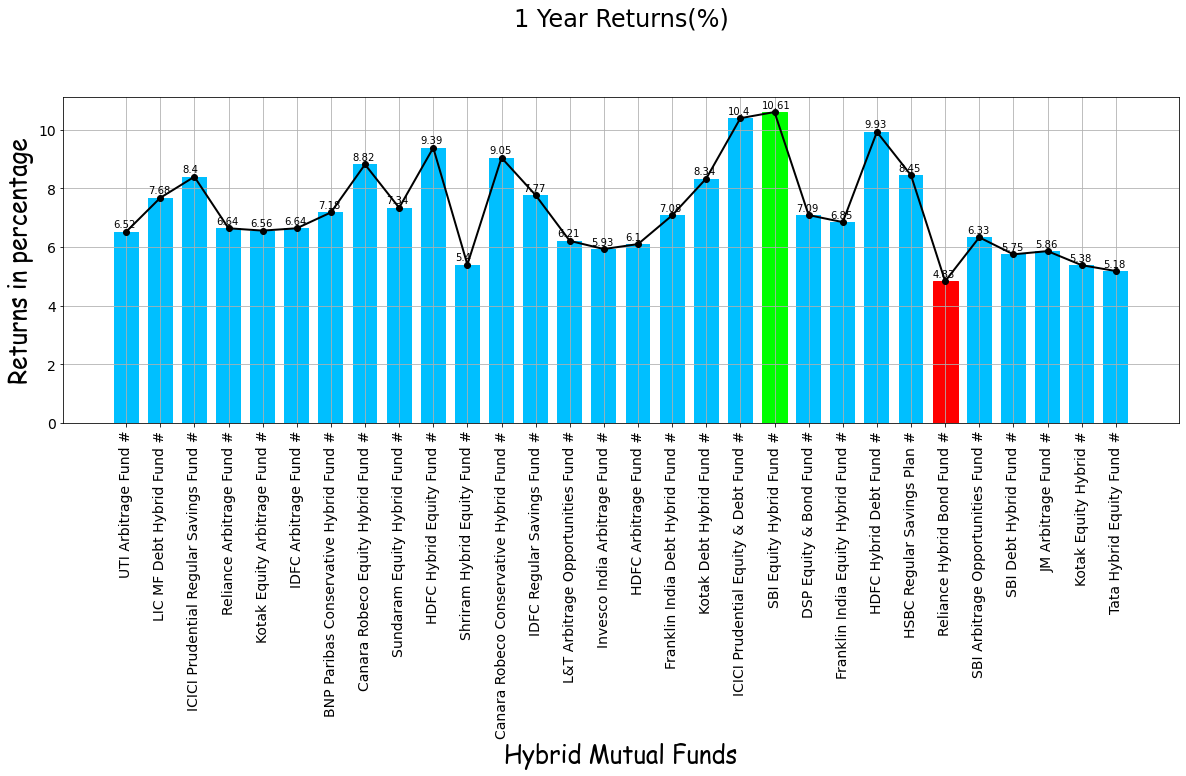

In [21]:
X=data['Fund_Scheme_Name']
#X.head(5)
Y=data['1_Yr_Return']
#Y.head(5)

bars = plt.bar(X,Y, color='deepskyblue', width=0.73)
bars[data['1_Yr_Return'].idxmin()].set_color('red')
bars[data['1_Yr_Return'].idxmax()].set_color('lime')
plt.title('1 Year Returns(%)', y=1.20, fontsize='24')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.grid()
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

#####  Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "1 year returns" where the lowest and the highest returning schemes have been shown in diffrent colors.

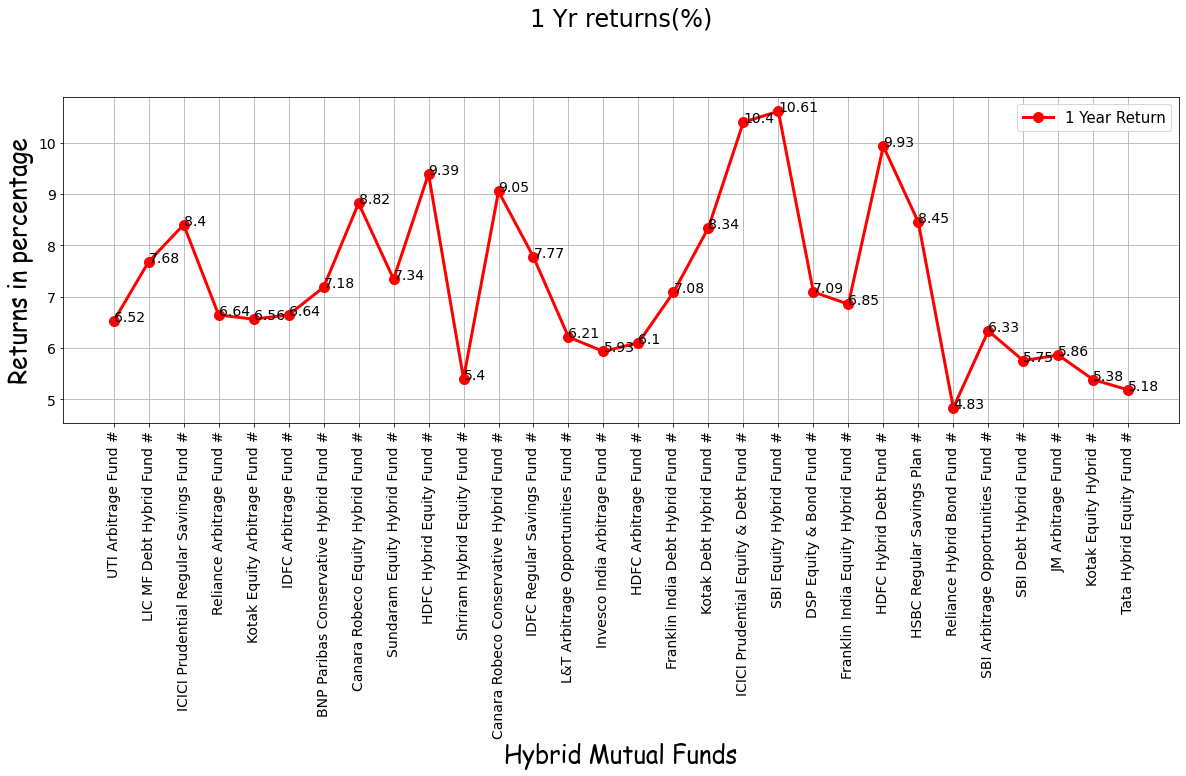

In [22]:
Y=data['1_Yr_Return']

labels=['1 Year Return']
lines=plt.plot(X, Y, linewidth='3.0', color='red', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('1 Yr returns(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

##### Simple line graph here between "Hybrid Mutual Fund" and "1 Year Returns" displays information as a series of data points called ‘markers’ connected by straight line segments. It is easy to compare points here and mark outliers.

### 3 YEAR RETURN:

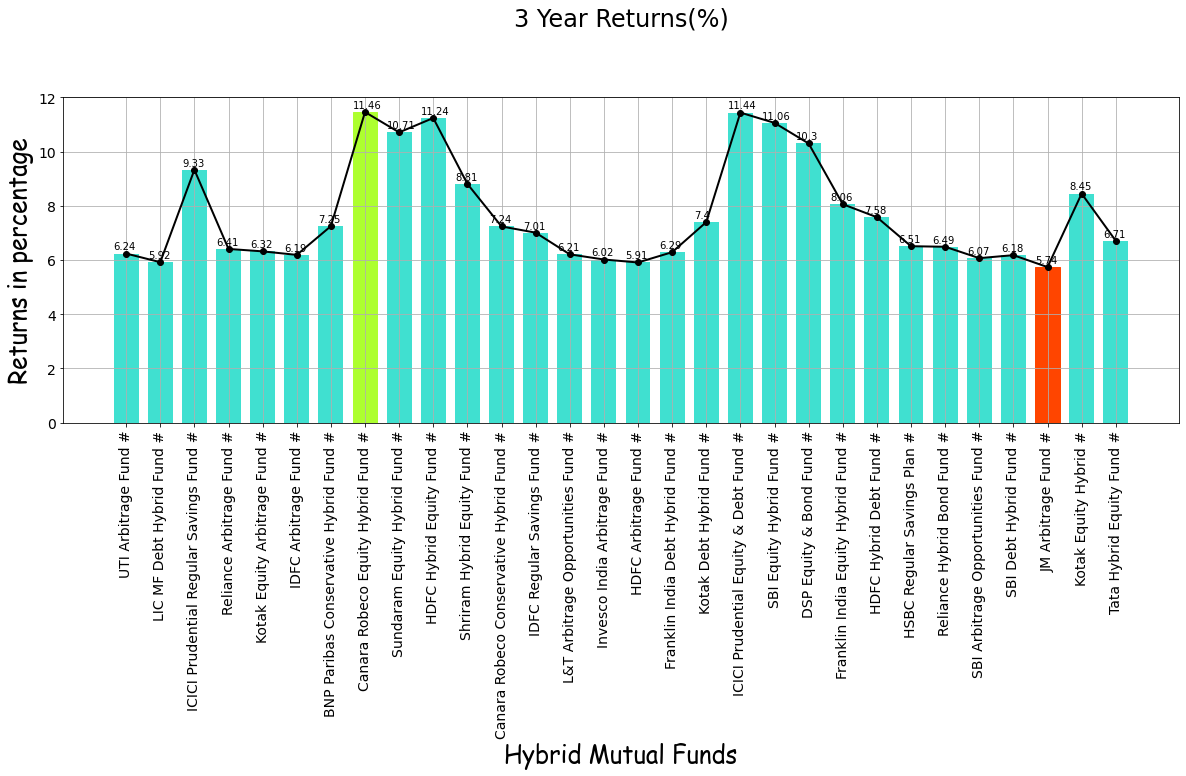

In [23]:
Y=data['3_Yr_Return']
#Y.head(5)

bars = plt.bar(X,Y, color='turquoise', width=0.73)
bars[data['3_Yr_Return'].idxmin()].set_color('orangered')
bars[data['3_Yr_Return'].idxmax()].set_color('greenyellow')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('3 Year Returns(%)', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

##### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "3 year returns" where the lowest and the highest returning schemes have been shown in diffrent colors.

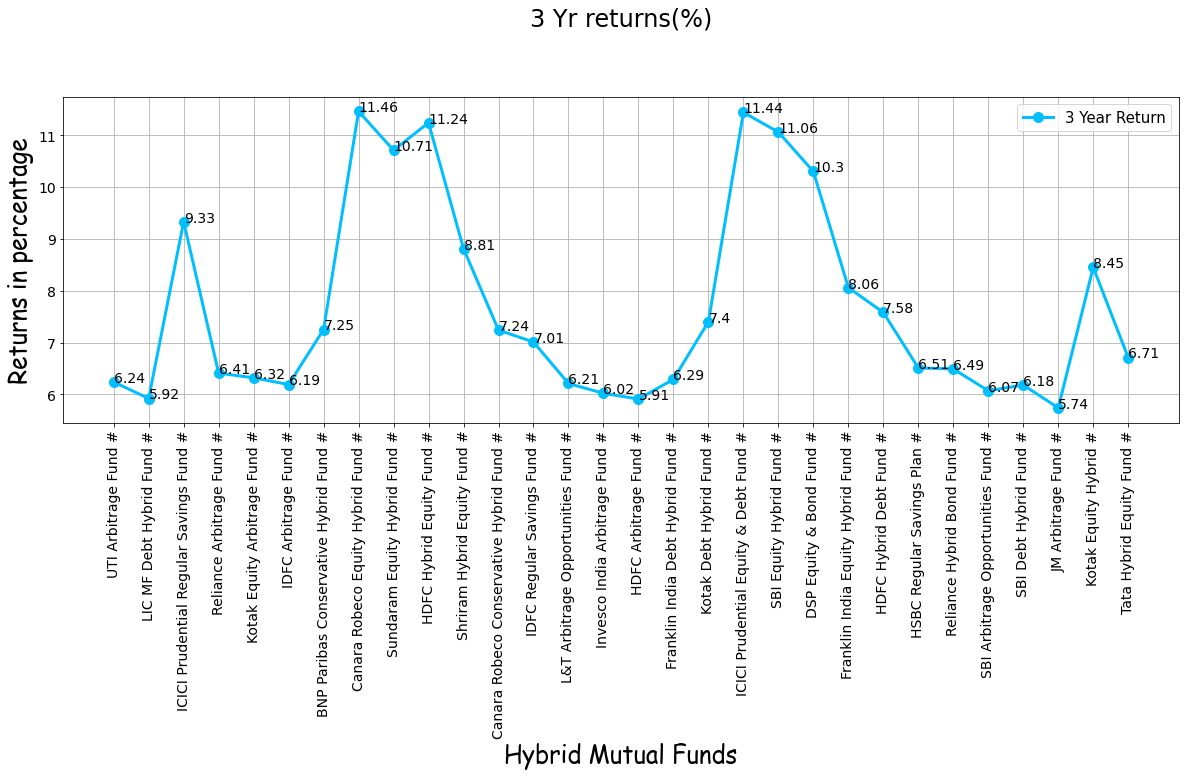

In [24]:
X=data['Fund_Scheme_Name']
Y=data['3_Yr_Return']

labels=['3 Year Return']
lines=plt.plot(X, Y, linewidth='3.0', color='deepskyblue', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('3 Yr returns(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

##### Simple line graph here between "Hybrid Mutual Fund" and "3 Year Returns" displays information as a series of data points called ‘markers’ connected by straight line segments. It is easy to compare points here and mark outliers.

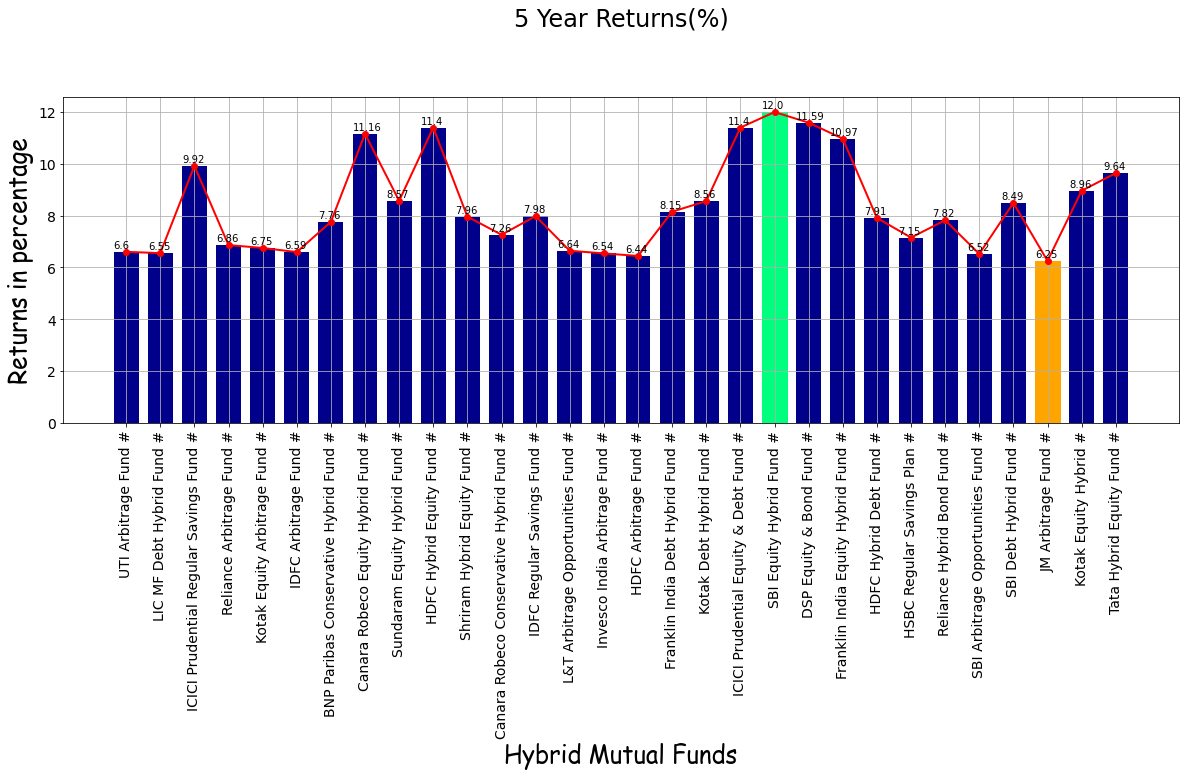

In [25]:
X=data['Fund_Scheme_Name']
#X.head(5)
Y=data['5_Yr_Return']
#Y.head(5)

bars = plt.bar(X,Y, color='darkblue', width=0.73)
bars[data['5_Yr_Return'].idxmin()].set_color('orange')
bars[data['5_Yr_Return'].idxmax()].set_color('springgreen')
plt.plot(X, Y, linewidth='2.0', color='red', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('5 Year Returns(%)', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

##### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "5 year returns" where the lowest and the highest returning schemes have been shown in different colors.

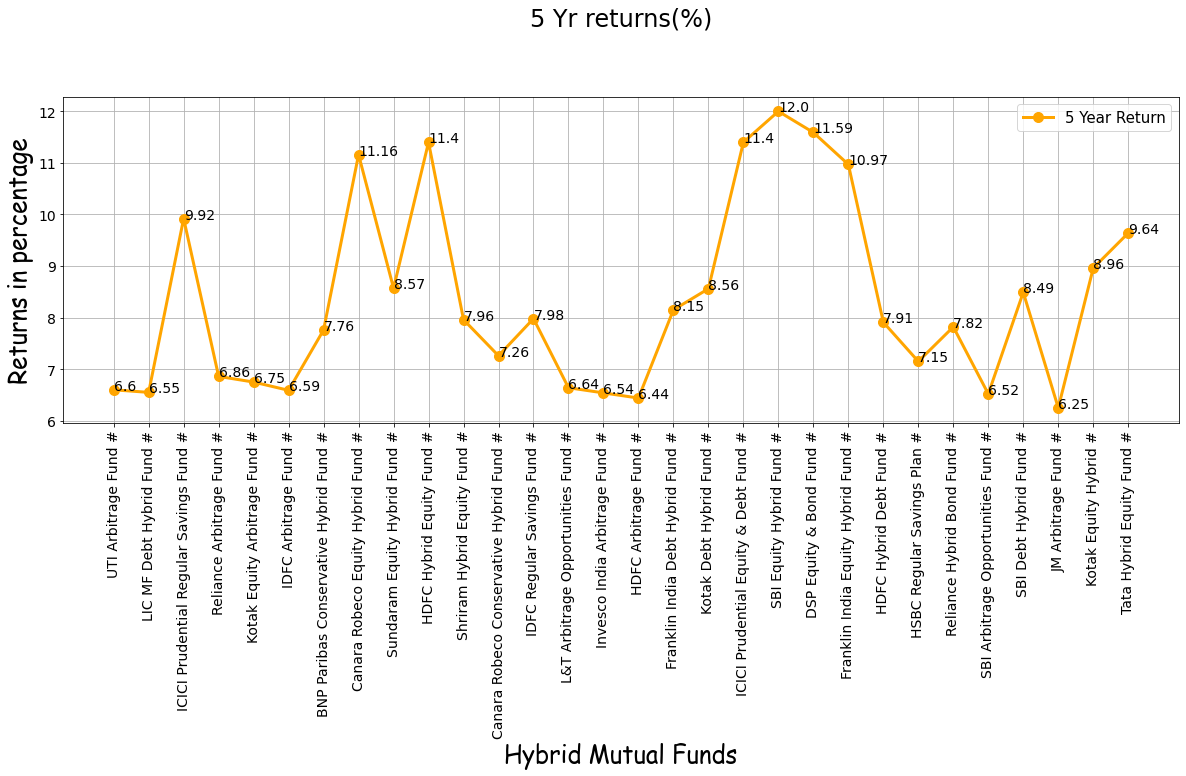

In [26]:
X=data['Fund_Scheme_Name']
Y=data['5_Yr_Return']

labels=['5 Year Return']
lines=plt.plot(X, Y, linewidth='3.0', color='orange', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('5 Yr returns(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

###### Simple line graph here between "Hybrid Mutual Fund" and "5 Year Returns" displays information as a series of data points called ‘markers’ connected by straight line segments. It is easy to compare points here and mark outliers.

### Comparing 1yr,3yr and 5 yr returns

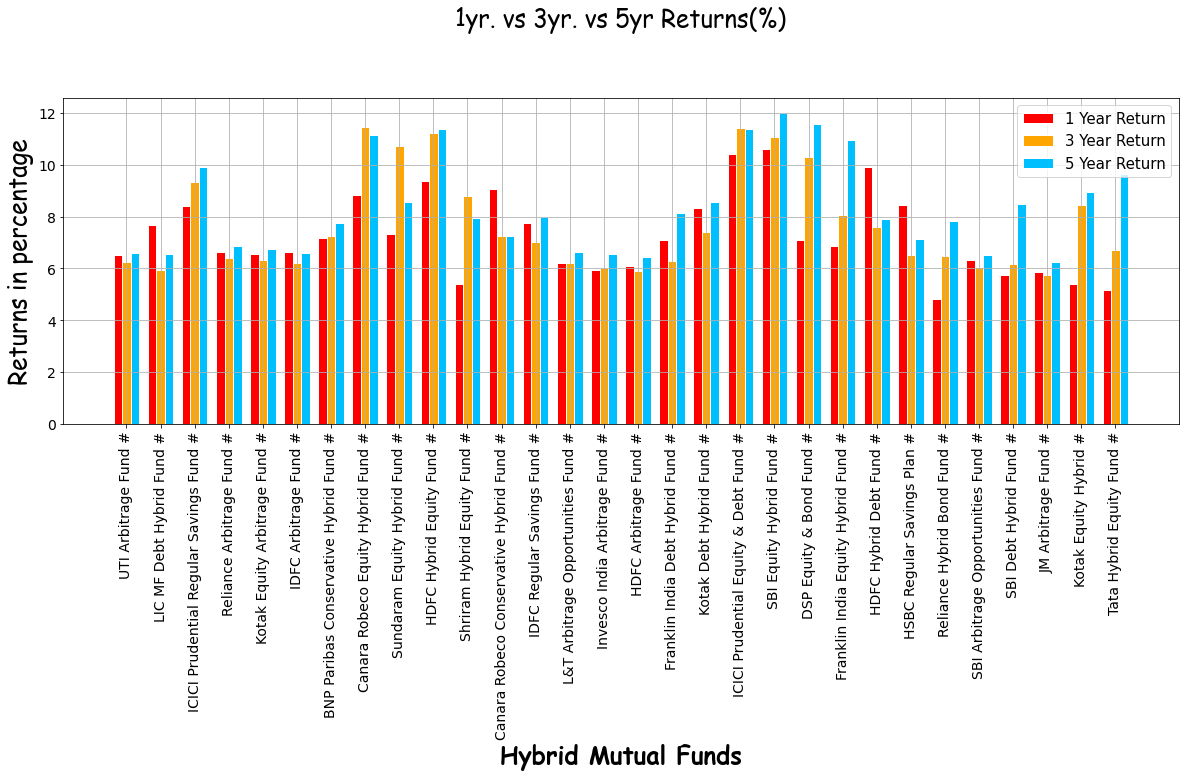

In [27]:
barWidth = 0.25
labels=['1 Year Return', '3 Year Return', '5 Year Return']

X = data['Fund_Scheme_Name']
Y1 = data['1_Yr_Return']
Y2 = data['3_Yr_Return']
Y3 = data['5_Yr_Return']
 
# Set position of bar on X axis
r1 = np.arange(len(Y1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, Y1, color='red', width=0.25, edgecolor='white', label='var1')
plt.bar(r2, Y2, color='orange', width=0.25, edgecolor='white', label='var2')
plt.bar(r3, Y3, color='deepskyblue', width=0.25, edgecolor='white', label='var3')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Y1))], X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('1yr. vs 3yr. vs 5yr Returns(%)', y=1.20, fontsize='24', fontname="Comic Sans MS")
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

plt.show()

##### Noting down the consistency from this grouped bar plot that compares 1 year, 3 year and 5 year returns versus Hybrid Mutual Funds all together to give useful insights to the customer.The return percentage of 1yr refund is mostly less.

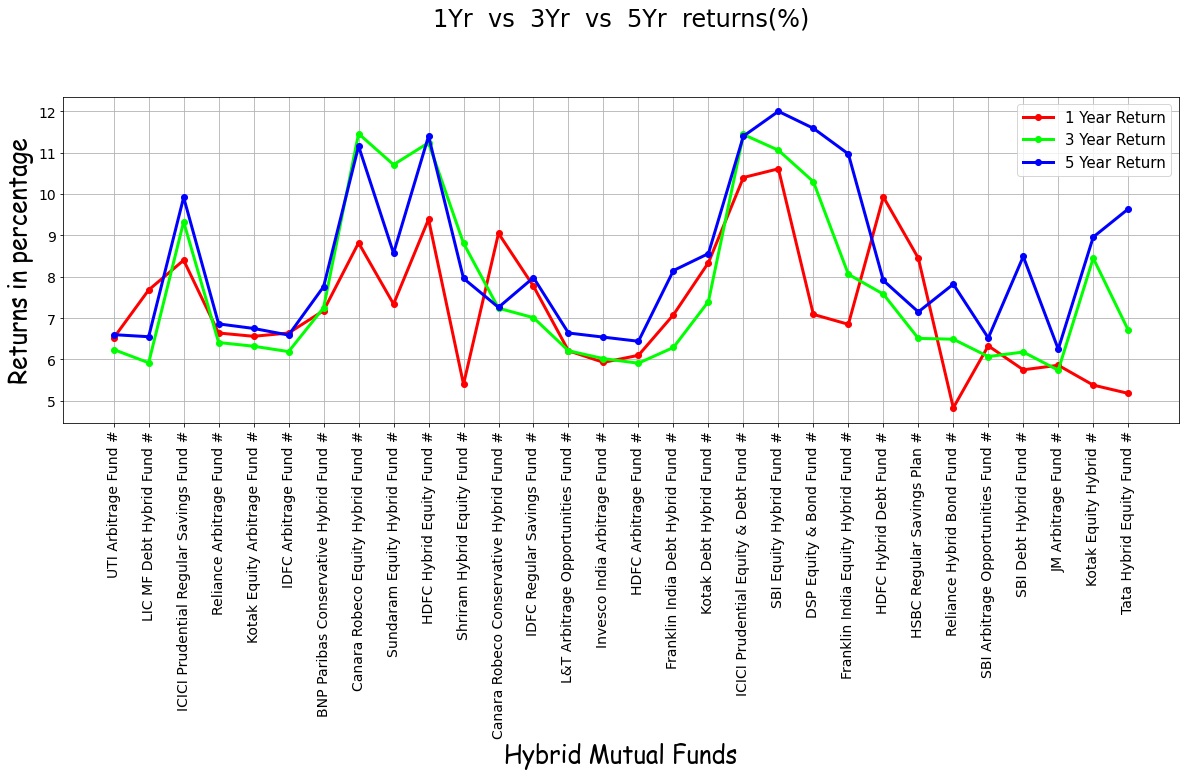

In [28]:
X=data['Fund_Scheme_Name']
Y1=data['1_Yr_Return']
Y2=data['3_Yr_Return']
Y3=data['5_Yr_Return']
labels=['1 Year Return', '3 Year Return', '5 Year Return']
lines=plt.plot(X, Y1, linewidth='3.0', color='red', marker='o', markersize='6')
lines=plt.plot(X, Y2, linewidth='3.0', color='lime', marker='o', markersize='6')
lines=plt.plot(X, Y3, linewidth='3.0', color='blue', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Returns in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('1Yr  vs  3Yr  vs  5Yr  returns(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()
'''
for i,j in zip(X,Y1):
    plt.annotate(str(j),xy=(i,j))
for i,j in zip(X,Y2):
    plt.annotate(str(j),xy=(i,j))
for i,j in zip(X,Y3):
    plt.annotate(str(j),xy=(i,j))
'''
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

##### This graph illustrates multiple lines representing 1 year, 3 year and 5 year returns and their growth or decline with respect to Hybrid mutual funds

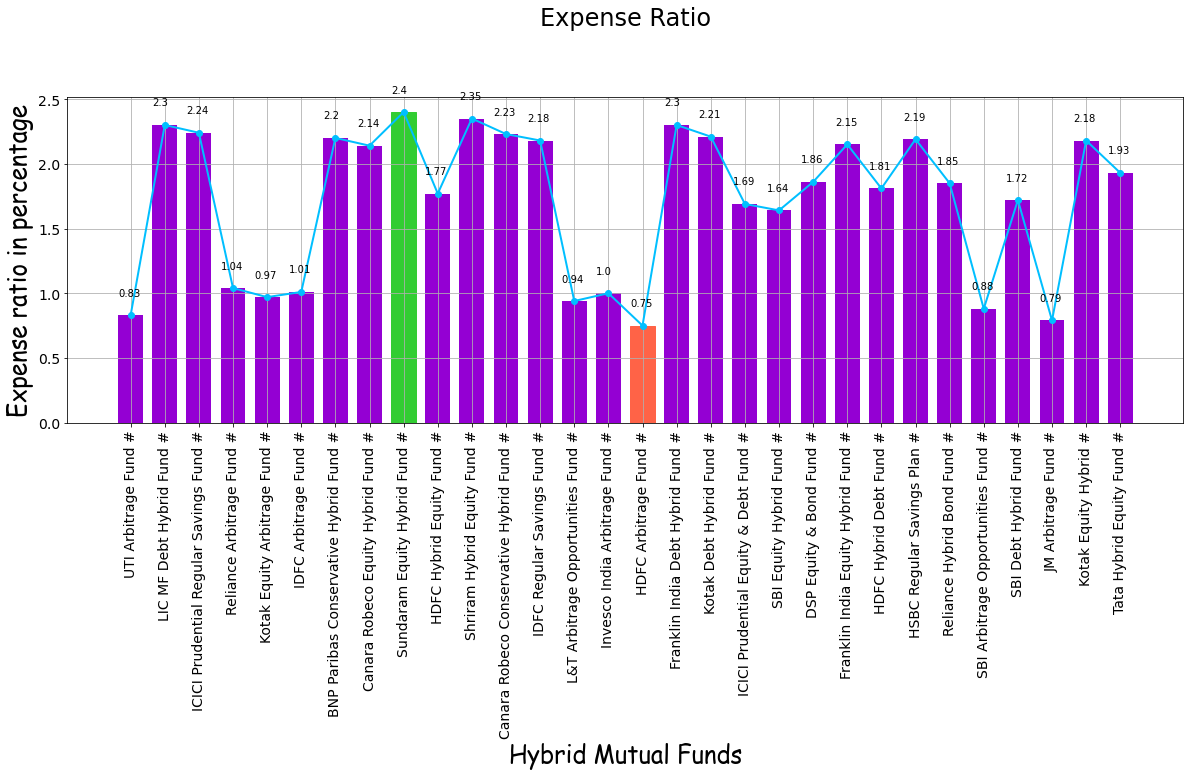

In [29]:
Y=data['Expense_Ratio']
#Y.head(5)

bars = plt.bar(X,Y, color='darkviolet', width=0.73)
bars[data['Expense_Ratio'].idxmin()].set_color('tomato')
bars[data['Expense_Ratio'].idxmax()].set_color('limegreen')
plt.plot(X, Y, linewidth='2.0', color='deepskyblue', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Expense ratio in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Expense Ratio', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

##### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "Expense Ratio" where the lowest and the highest expensive schemes have been shown in diffrent colors.

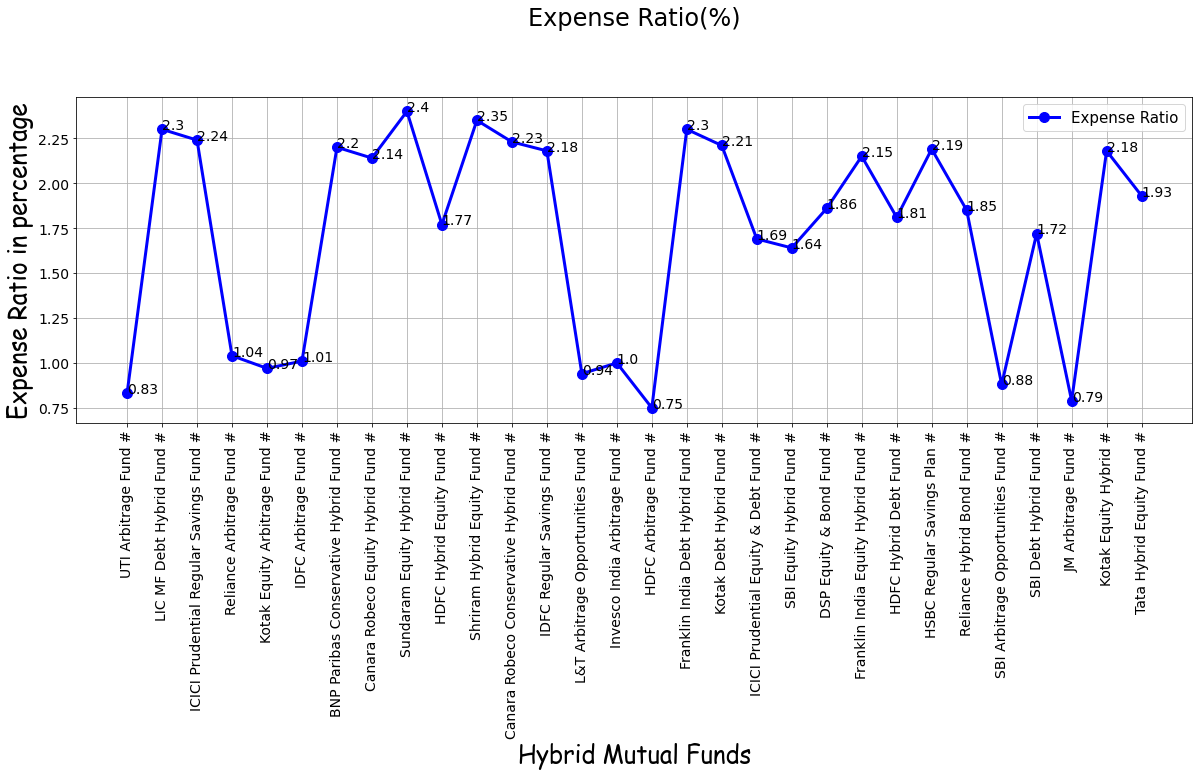

In [30]:
X=data['Fund_Scheme_Name']
Y=data['Expense_Ratio']

labels=['Expense Ratio']
lines=plt.plot(X, Y, linewidth='3.0', color='blue', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Expense Ratio in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('Expense Ratio(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()


##### Simple line graph here between "Hybrid Mutual Fund" and "Expense Ratio" displays information as a series of data points called ‘markers’ connected by straight line segments. It is easy to compare points here and mark outliers.

### SHARP RATIO:

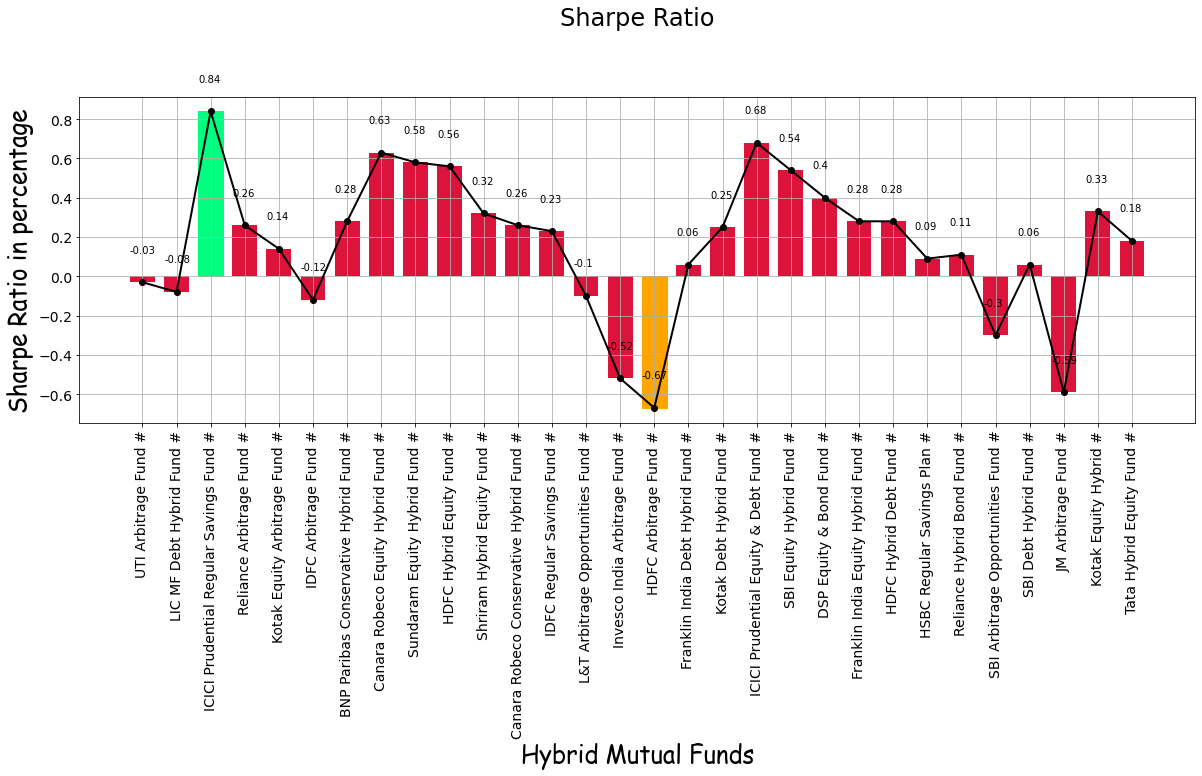

In [31]:
Y=data['Sharpe_Ratio']
#Y.head(5)

bars = plt.bar(X,Y, color='crimson', width=0.73)
bars[data['Sharpe_Ratio'].idxmin()].set_color('orange')
bars[data['Sharpe_Ratio'].idxmax()].set_color('springgreen')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Sharpe Ratio in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Sharpe Ratio', y=1.20, fontsize=24)
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

##### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "Sharpe ratio" where schemes with lowest and the highest ratios have been shown in diffrent colors.

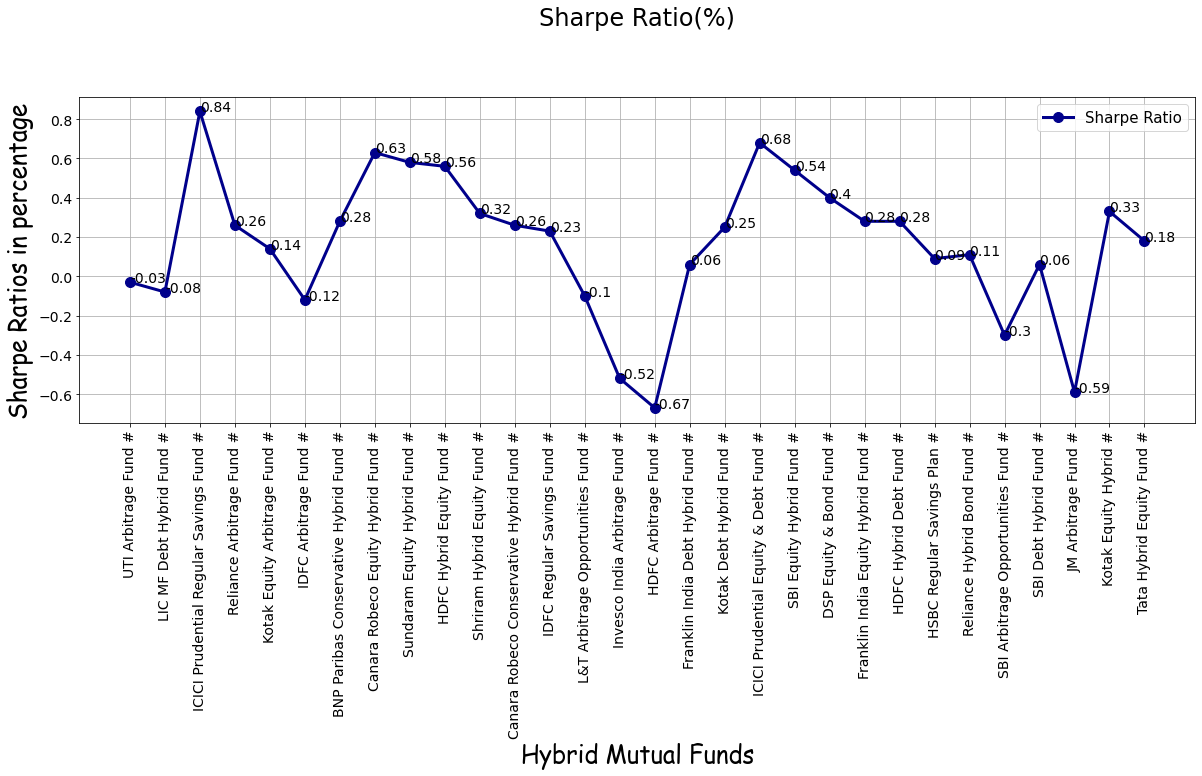

In [32]:
X=data['Fund_Scheme_Name']
Y=data['Sharpe_Ratio']

labels=['Sharpe Ratio']
lines=plt.plot(X, Y, linewidth='3.0', color='darkblue', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Sharpe Ratios in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('Sharpe Ratio(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

##### Simple line graph here between "Hybrid Mutual Fund" and "Sharpe ratio" displays information as a series of data points called ‘markers’ connected by straight line segments. It is easy to compare points here and mark outliers.

### SORTINO RATIO:

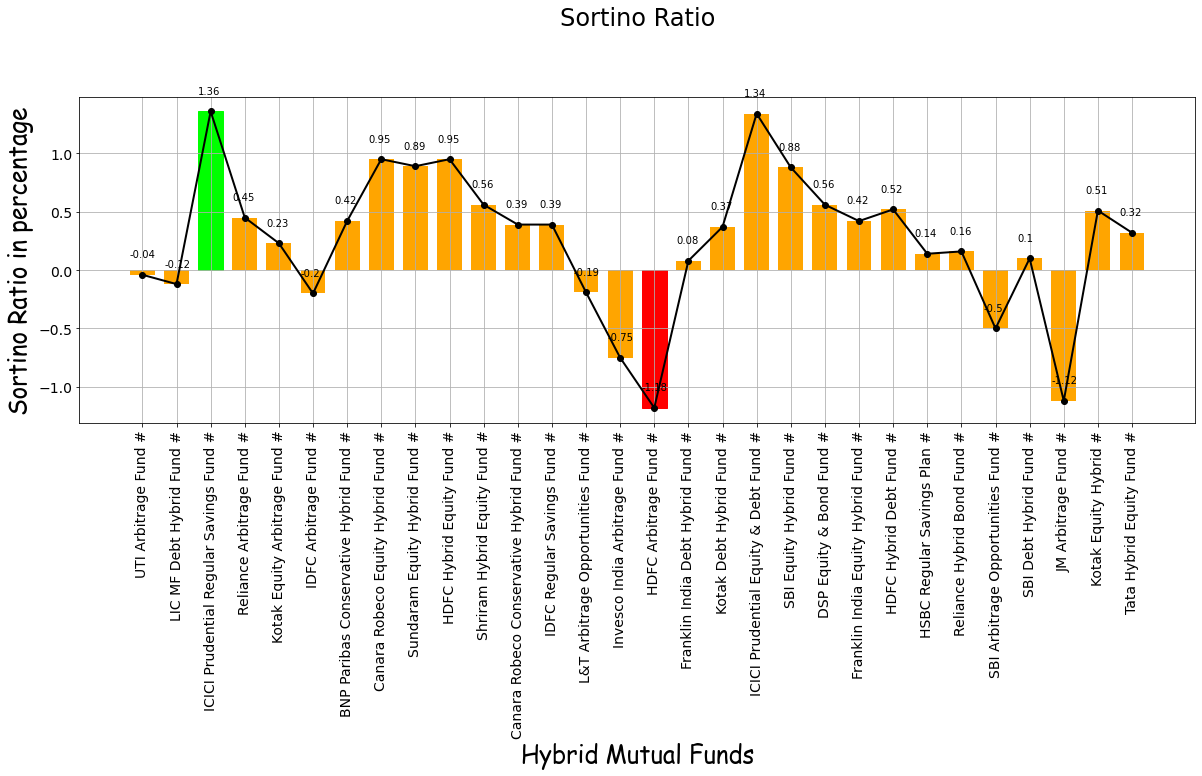

In [33]:
Y=data['Sortino_Ratio']
#Y.head(5)

bars = plt.bar(X,Y, color='orange', width=0.73)
bars[data['Sortino_Ratio'].idxmin()].set_color('red')
bars[data['Sortino_Ratio'].idxmax()].set_color('lime')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Sortino Ratio in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Sortino Ratio', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

##### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "Sortino ratio" where schemes with lowest and the highest ratios have been shown in diffrent colors.

### Alpha:

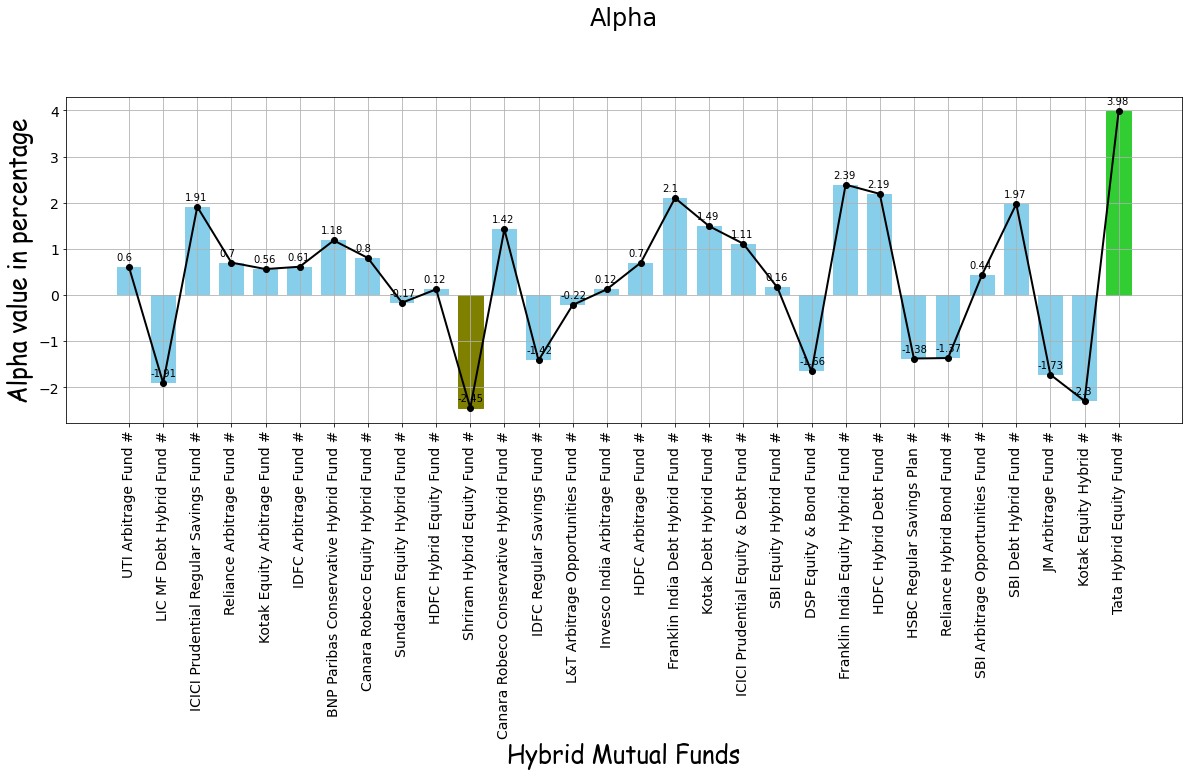

In [34]:
Y=data['Alpha']
#Y.head(5)

bars = plt.bar(X,Y, color='skyblue', width=0.73)
bars[data['Alpha'].idxmin()].set_color('olive')
bars[data['Alpha'].idxmax()].set_color('limegreen')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Alpha value in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.grid()
plt.title('Alpha', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

##### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "Alpha" where schemes with lowest and the highest ratios have been shown in diffrent colors.

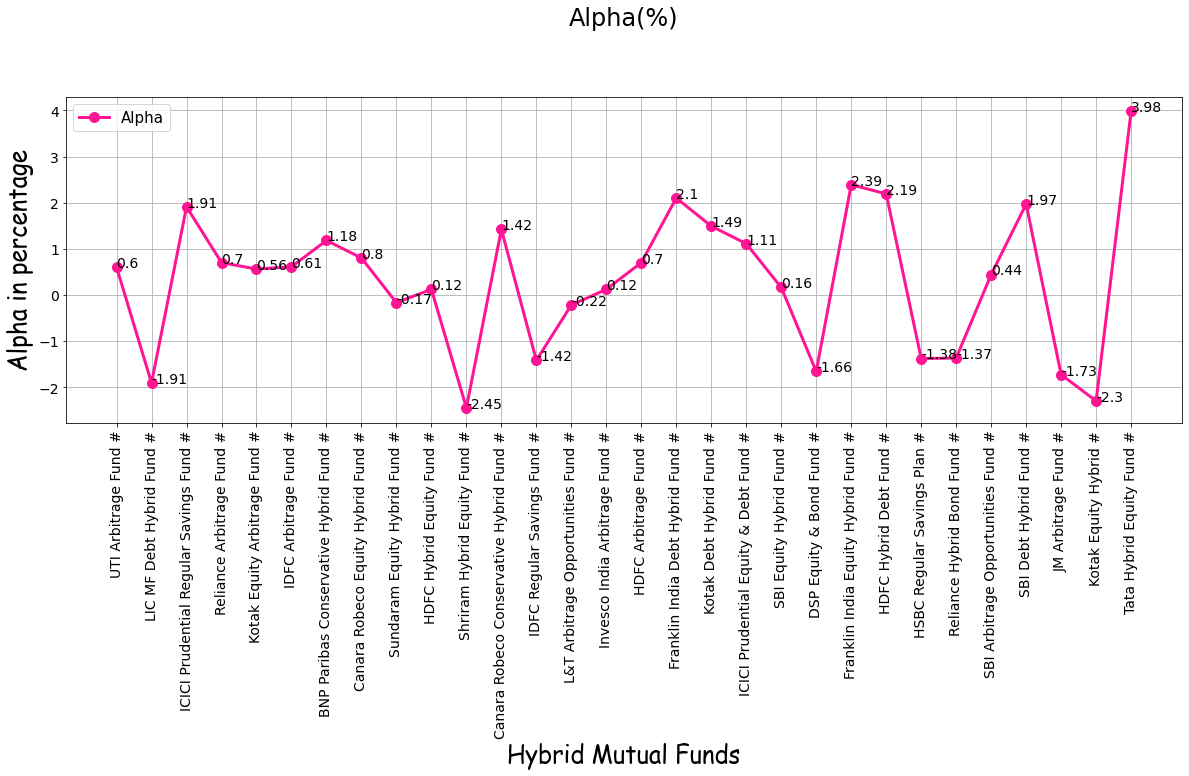

In [35]:
X=data['Fund_Scheme_Name']
Y=data['Alpha']

labels=['Alpha']
lines=plt.plot(X, Y, linewidth='3.0', color='deeppink', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Alpha in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('Alpha(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(0.1,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

##### Simple line graph here between "Hybrid Mutual Fund" and "Alpha" displays information as a series of data points called ‘markers’ connected by straight line segments. It is easy to compare points here and mark outliers.

### BETA:

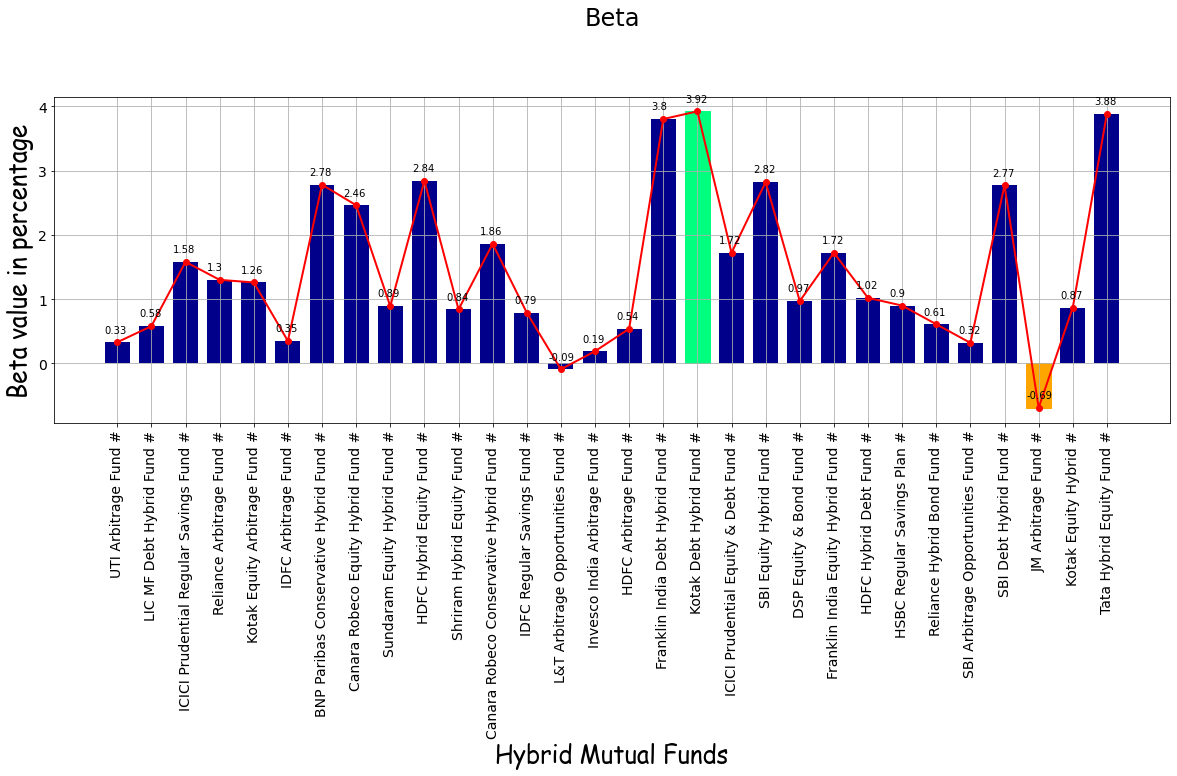

In [37]:
Y=data['Beta']
#Y.head(5)

bars = plt.bar(X,Y, color='darkblue', width=0.73)
bars[data['Beta'].idxmin()].set_color('orange')
bars[data['Beta'].idxmax()].set_color('springgreen')
plt.plot(X, Y, linewidth='2.0', color='red', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Beta value in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Beta', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

##### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "Beta" where schemes with lowest and the highest ratios have been shown in diffrent colors.

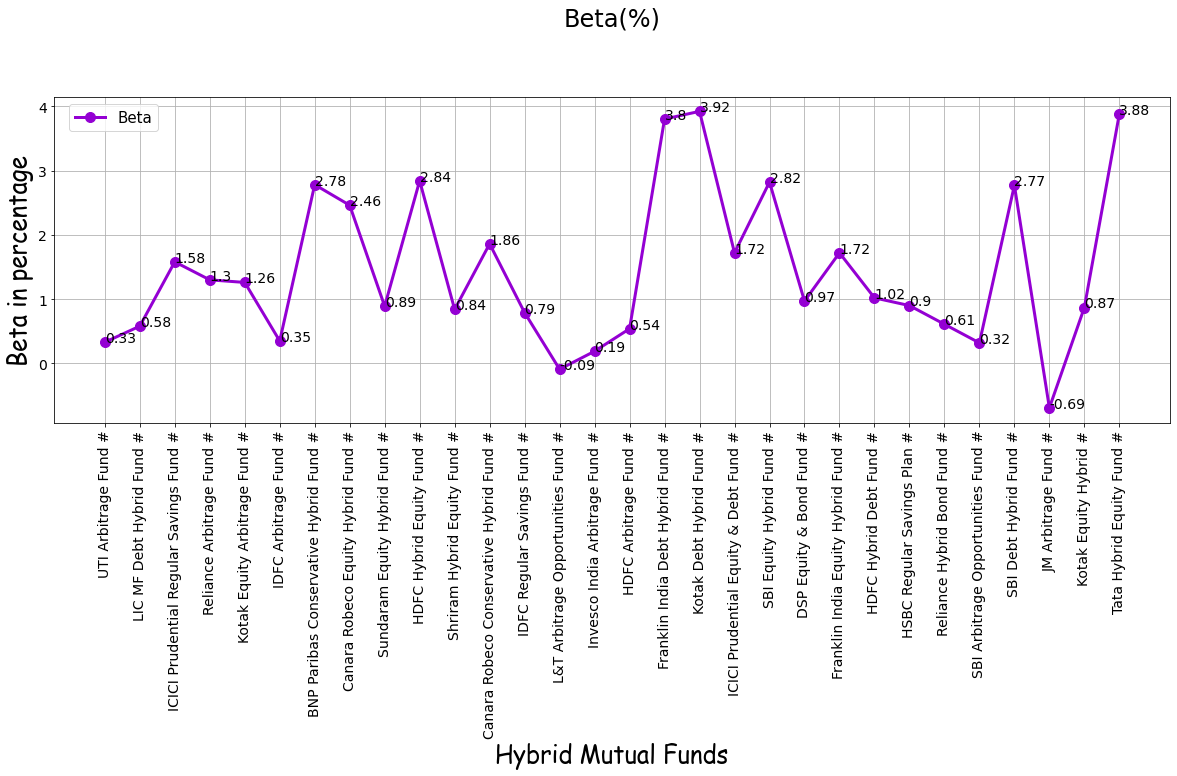

In [38]:
X=data['Fund_Scheme_Name']
Y=data['Beta']

labels=['Beta']
lines=plt.plot(X, Y, linewidth='3.0', color='darkviolet', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Beta in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('Beta(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(0.1,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

##### Simple line graph here between "Hybrid Mutual Fund" and "Beta" displays information as a series of data points called ‘markers’ connected by straight line segments. It is easy to compare points here and mark outliers.

### Standard deviation:

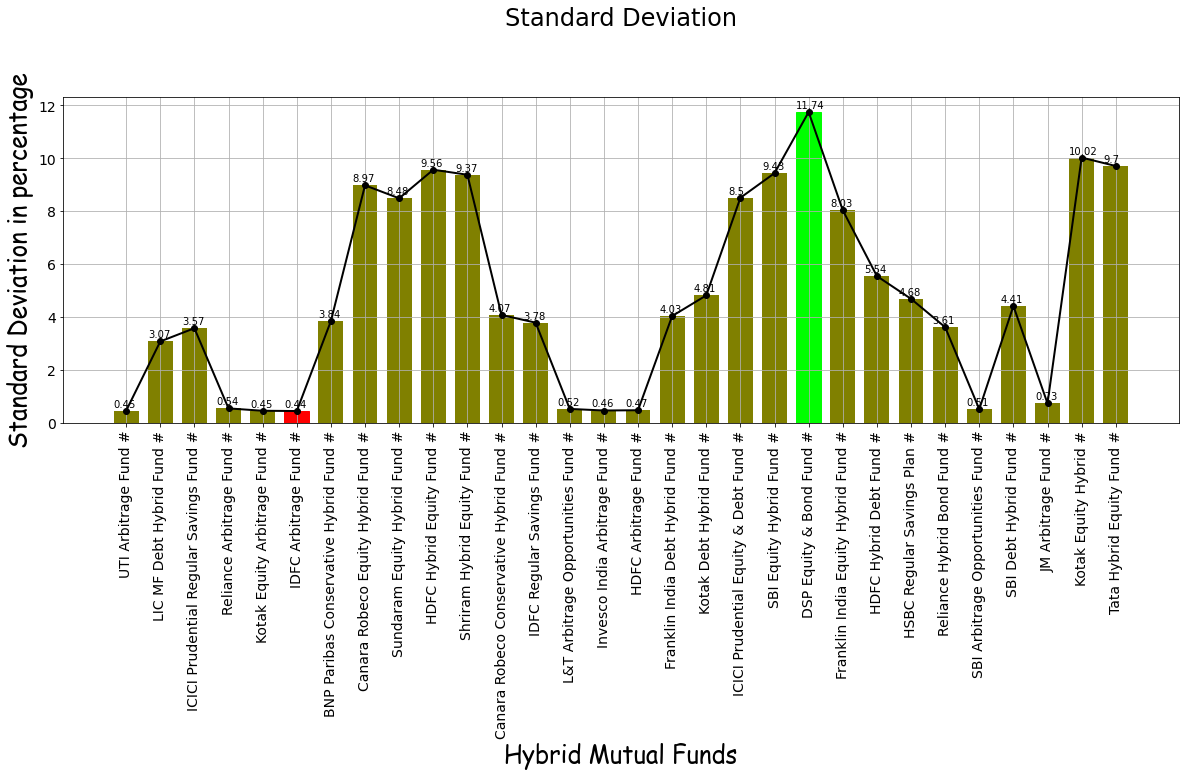

In [39]:
Y=data['Std_Dev']
#Y.head(5)

bars = plt.bar(X,Y, color='olive', width=0.73)
bars[data['Std_Dev'].idxmin()].set_color('red')
bars[data['Std_Dev'].idxmax()].set_color('lime')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Standard Deviation in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Standard Deviation', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

##### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "Standard Deviation" where schemes with lowest and the highest ratios have been shown in diffrent colors. Highest was recorded for "DSP eQUITY AND BOND FUND".

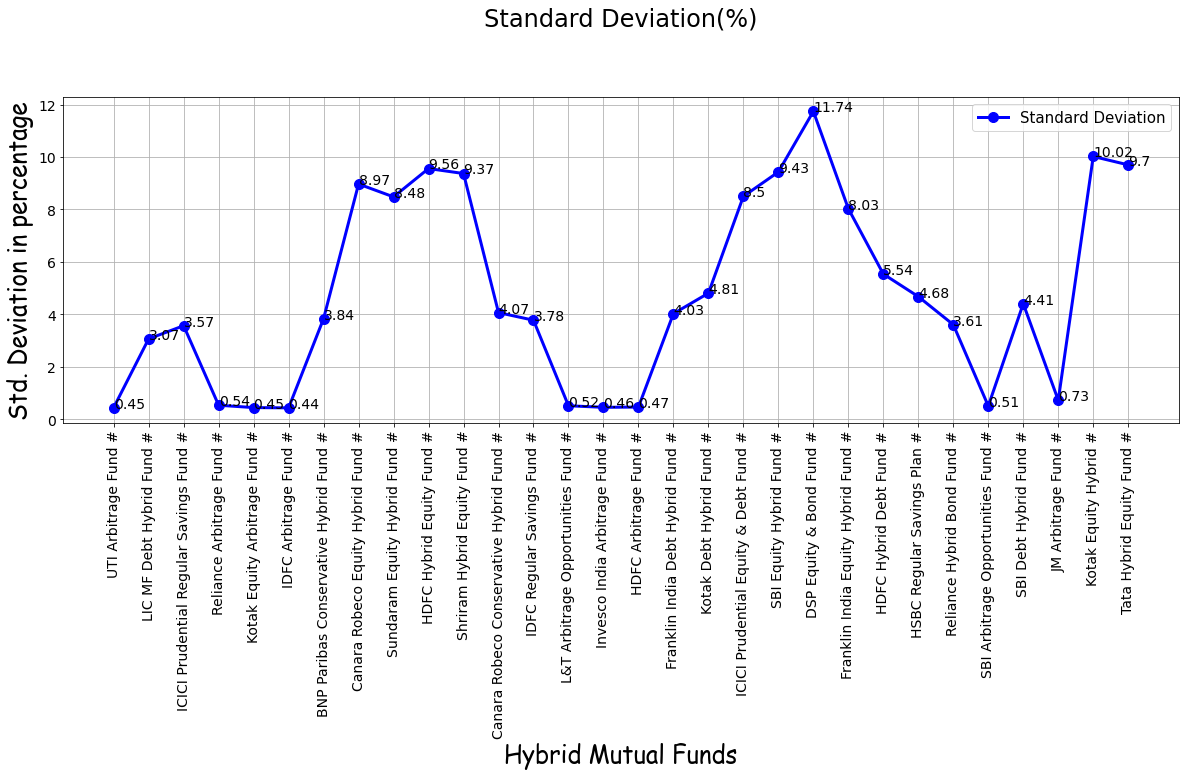

In [40]:
X=data['Fund_Scheme_Name']
Y=data['Std_Dev']

labels=['Standard Deviation']
lines=plt.plot(X, Y, linewidth='3.0', color='blue', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Std. Deviation in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('Standard Deviation(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

#### Simple line graph here between "Hybrid Mutual Fund" and "standard deviation" displays information as a series of data points called ‘markers’ connected by straight line segments. It is easy to compare points here and mark outliers.

### R score:

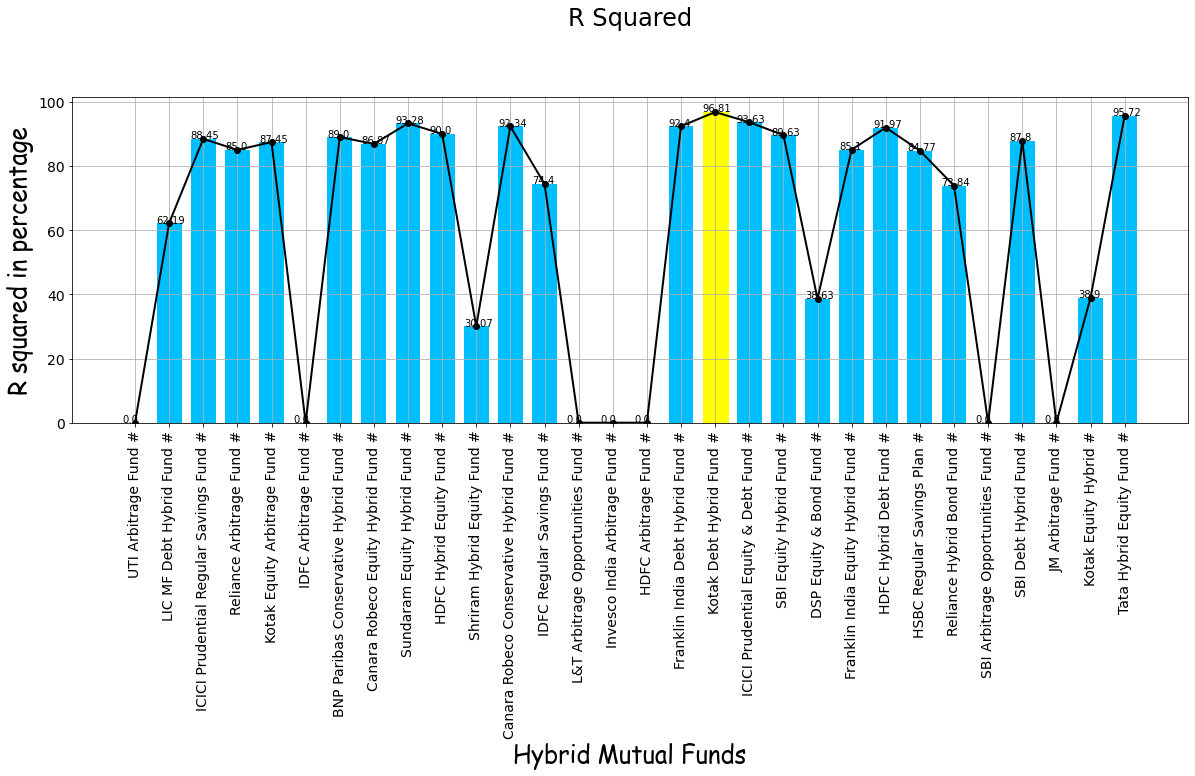

In [41]:
Y=data['R_Squared']
#Y.head(5)

bars = plt.bar(X,Y, color='deepskyblue', width=0.73)
bars[data['R_Squared'].idxmin()].set_color('orange')
bars[data['R_Squared'].idxmax()].set_color('yellow')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('R squared in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('R Squared', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

##### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "R Squared" where schemes with lowest and the highest ratios have been shown in diffrent colors.

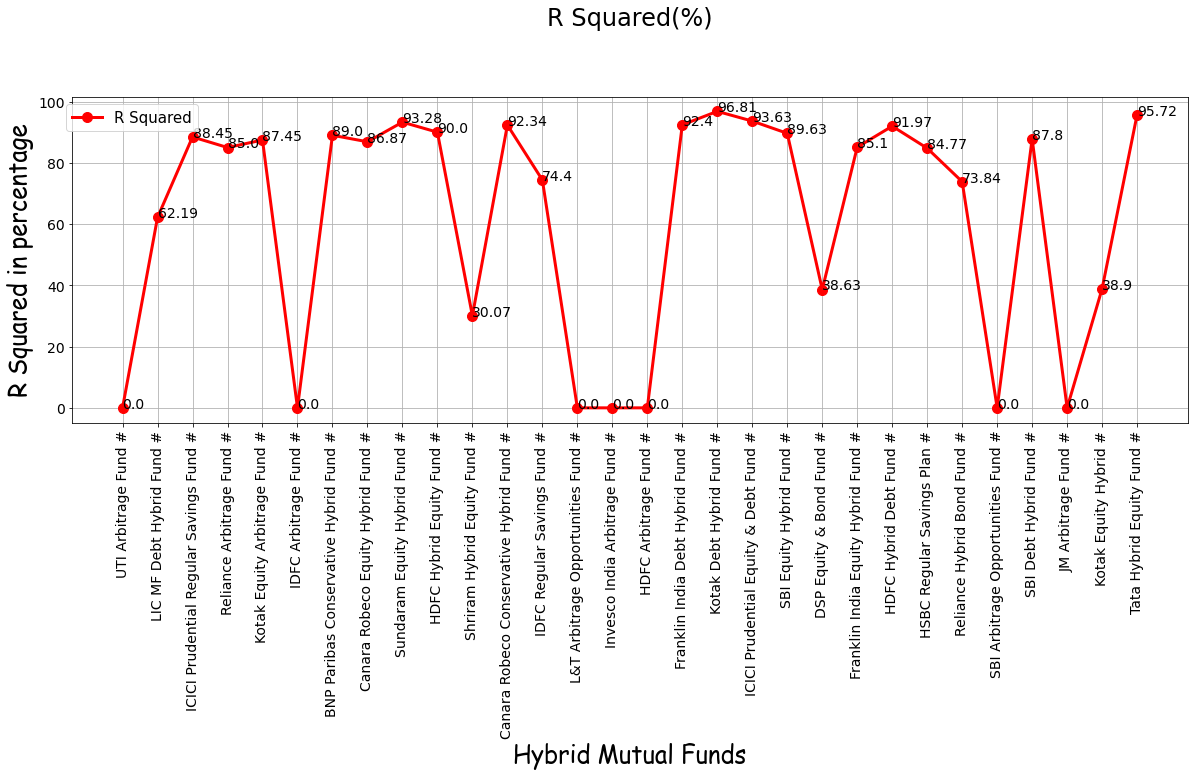

In [42]:
X=data['Fund_Scheme_Name']
Y=data['R_Squared']

labels=['R Squared']
lines=plt.plot(X, Y, linewidth='3.0', color='red', marker='o', markersize='10')

plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('R Squared in percentage', fontsize=24, fontname="Comic Sans MS" )
plt.title('R Squared(%)', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(0.12,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()

for i,j in zip(X,Y):
    plt.annotate(str(j),xy=(i,j))


plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

##### Simple line graph here between "Hybrid Mutual Fund" and "R Squared" displays information as a series of data points called ‘markers’ connected by straight line segments. It is easy to compare points here and mark outliers.

### Year trailing:

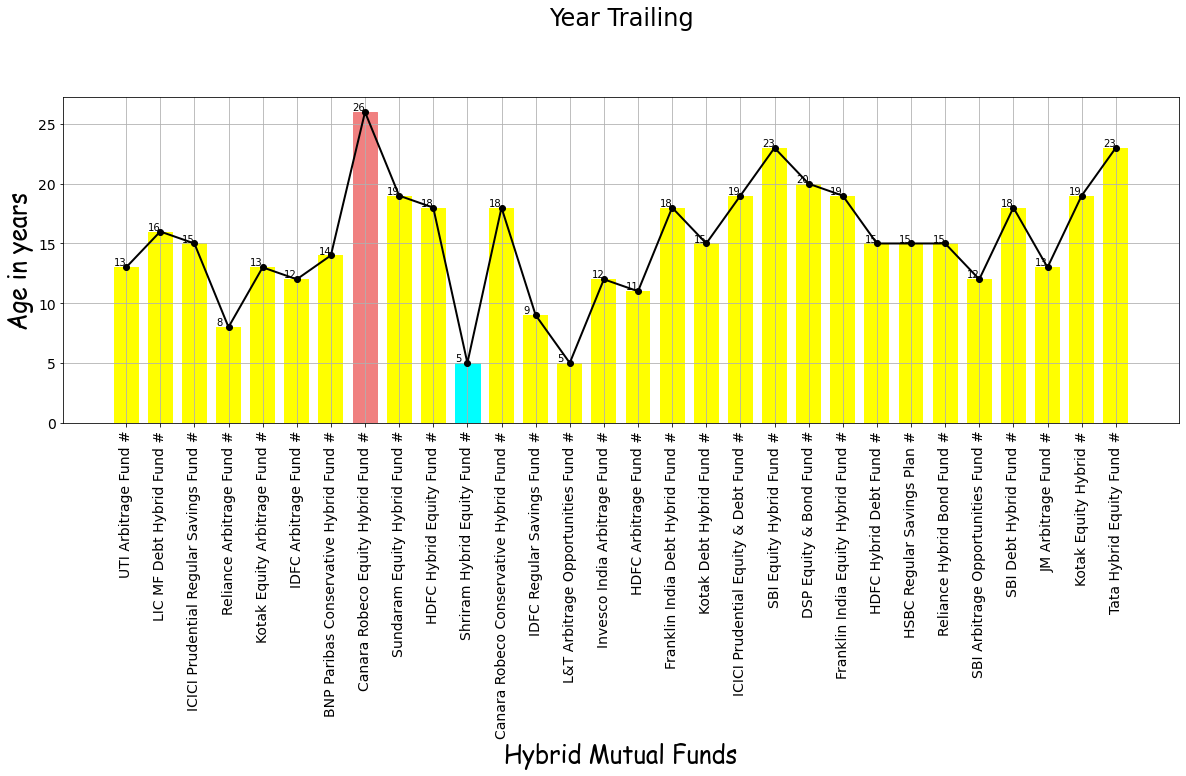

In [43]:
Y=data['Year_Trailing']
#Y.head(5)

bars = plt.bar(X,Y, color='yellow', width=0.73)
bars[data['Year_Trailing'].idxmin()].set_color('aqua')
#bars[data['Year_Trailing'].idxmin()+3].set_color('aqua')
bars[data['Year_Trailing'].idxmax()].set_color('lightcoral')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Age in years', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Year Trailing', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

##### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "Age" where schemes with lowest and the highest age have been shown in diffrent colors.

### NET RETURNS:

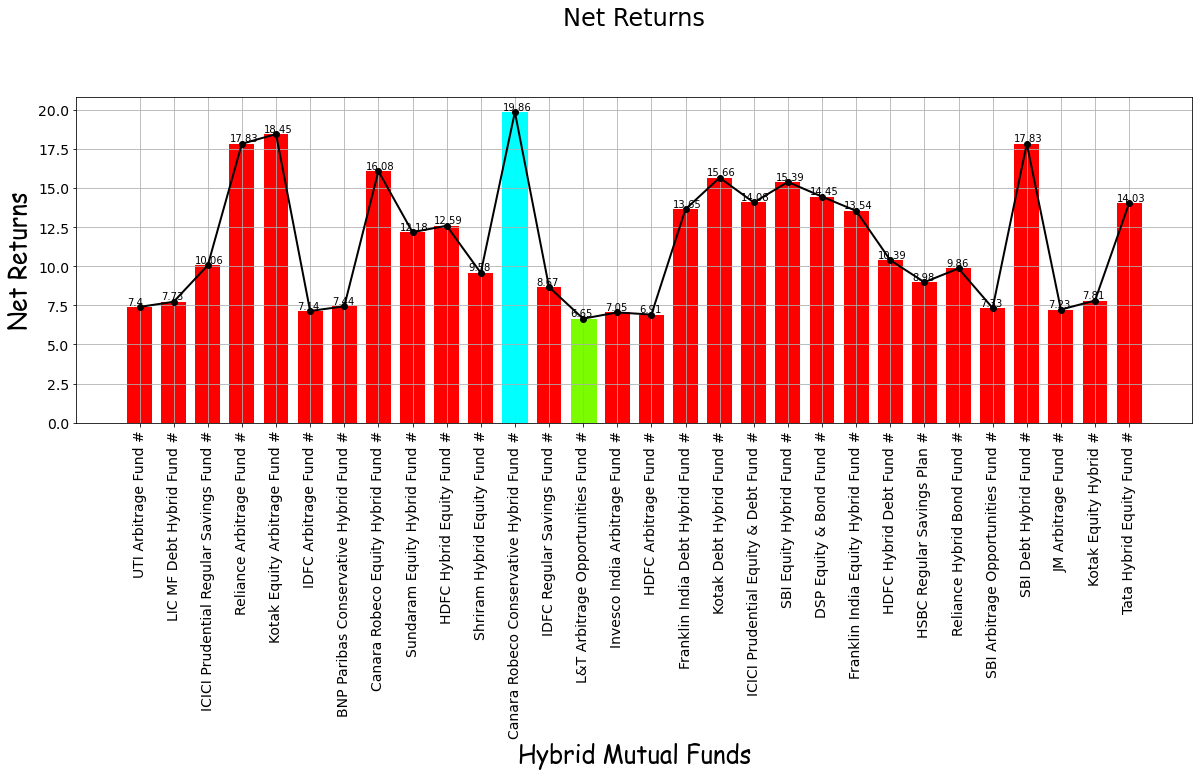

In [44]:
Y=data['Net_Return']
#Y.head(5)

bars = plt.bar(X,Y, color='red', width=0.73)
bars[11].set_color('aqua')
bars[13].set_color('lawngreen')
plt.plot(X, Y, linewidth='2.0', color='black', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Net Returns', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Net Returns', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval+0.15, yval, fontsize=10)


plt.show()

##### Bar plot along with line plot and annotations here show relationship between "Hybrid Mutual Funds" and "Net returns" where schemes with lowest and the highest returns have been shown in diffrent colors.

### Goodscheme parameters:

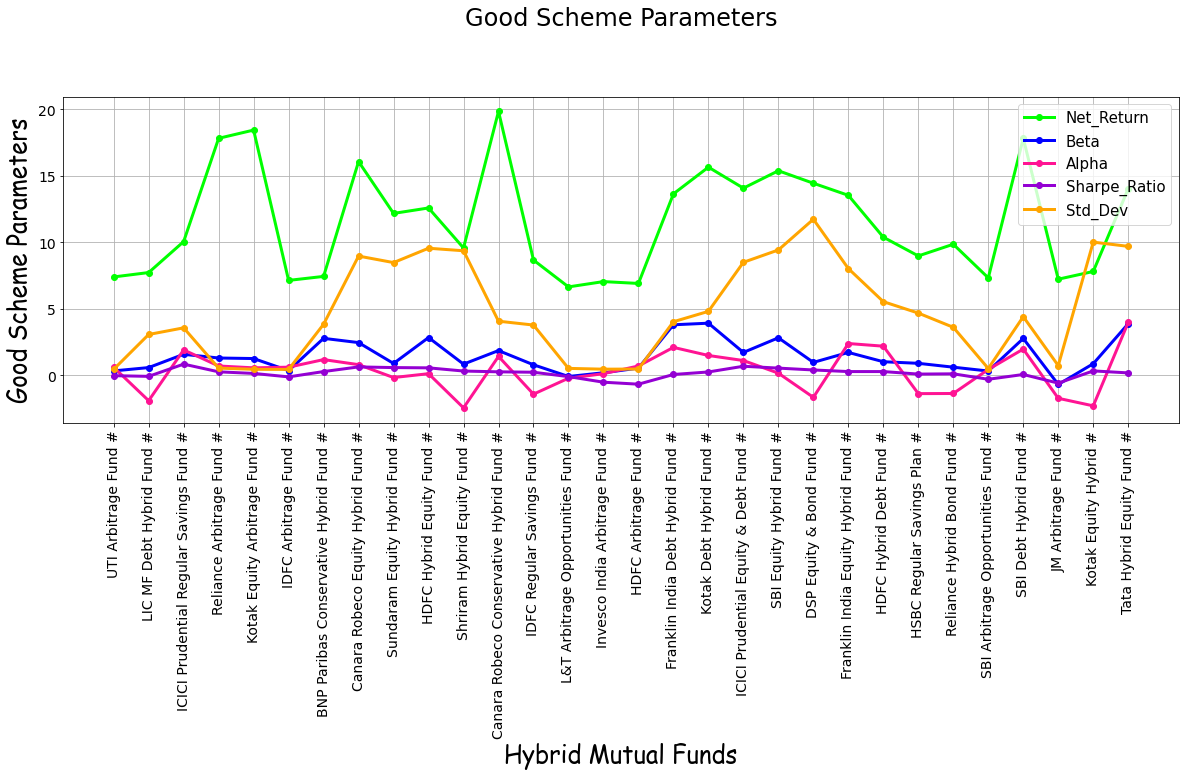

In [45]:
X=data['Fund_Scheme_Name']
#Y1=data['R_Squared']
Y2=data['Net_Return']
Y3=data['Beta']
Y4=data['Alpha']
Y5=data['Sharpe_Ratio']
Y6=data['Std_Dev']

#labels=['R_Squared', 'Net_Return', 'Beta', 'Alpha', 'Sharpe_Ratio', 'Std_Dev']
labels=['Net_Return', 'Beta', 'Alpha', 'Sharpe_Ratio', 'Std_Dev']
#lines=plt.plot(X, Y1, linewidth='3.0', color='red', marker='o', markersize='6')
lines=plt.plot(X, Y2, linewidth='3.0', color='lime', marker='o', markersize='6')
lines=plt.plot(X, Y3, linewidth='3.0', color='blue', marker='o', markersize='6')
lines=plt.plot(X, Y4, linewidth='3.0', color='deeppink', marker='o', markersize='6')
lines=plt.plot(X, Y5, linewidth='3.0', color='darkviolet', marker='o', markersize='6')
lines=plt.plot(X, Y6, linewidth='3.0', color='orange', marker='o', markersize='6')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Good Scheme Parameters', fontsize=24, fontname="Comic Sans MS" )
plt.title('Good Scheme Parameters', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.0,1.0), fontsize=15)
plt.xticks(X, rotation='vertical')
plt.grid()
'''
for i,j in zip(X,Y1):
    plt.annotate(str(j),xy=(i,j))
for i,j in zip(X,Y2):
    plt.annotate(str(j),xy=(i,j))
for i,j in zip(X,Y3):
    plt.annotate(str(j),xy=(i,j))
'''
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()


##### Good scheme parameters for the Net returns is high in most cases!

### Distinction between Good and bad schemes:

#### 1) Based on R-squared

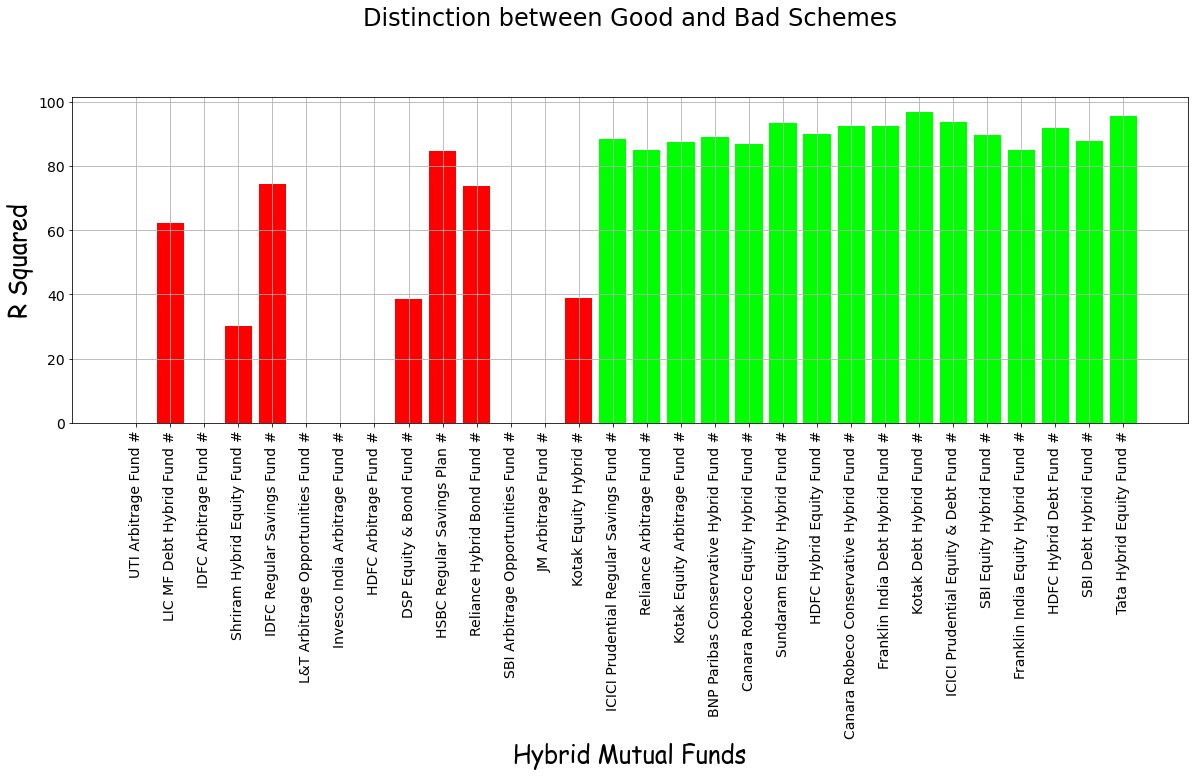

In [46]:
X = data['Fund_Scheme_Name']
Y = data['R_Squared']

mask1 = Y < 85.0   # masking with respect to R-SQUARD VALUE
mask2 = Y >= 85.0

plt.bar(X[mask1], Y[mask1], color = 'red')
plt.bar(X[mask2], Y[mask2], color = 'lime')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('R Squared', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

#### Good schemes are filtered out based on condition where R squared value > 85 indicated in green color and rest in red color which are not considered as good schemes.

#### 2) Based on Net-returns:

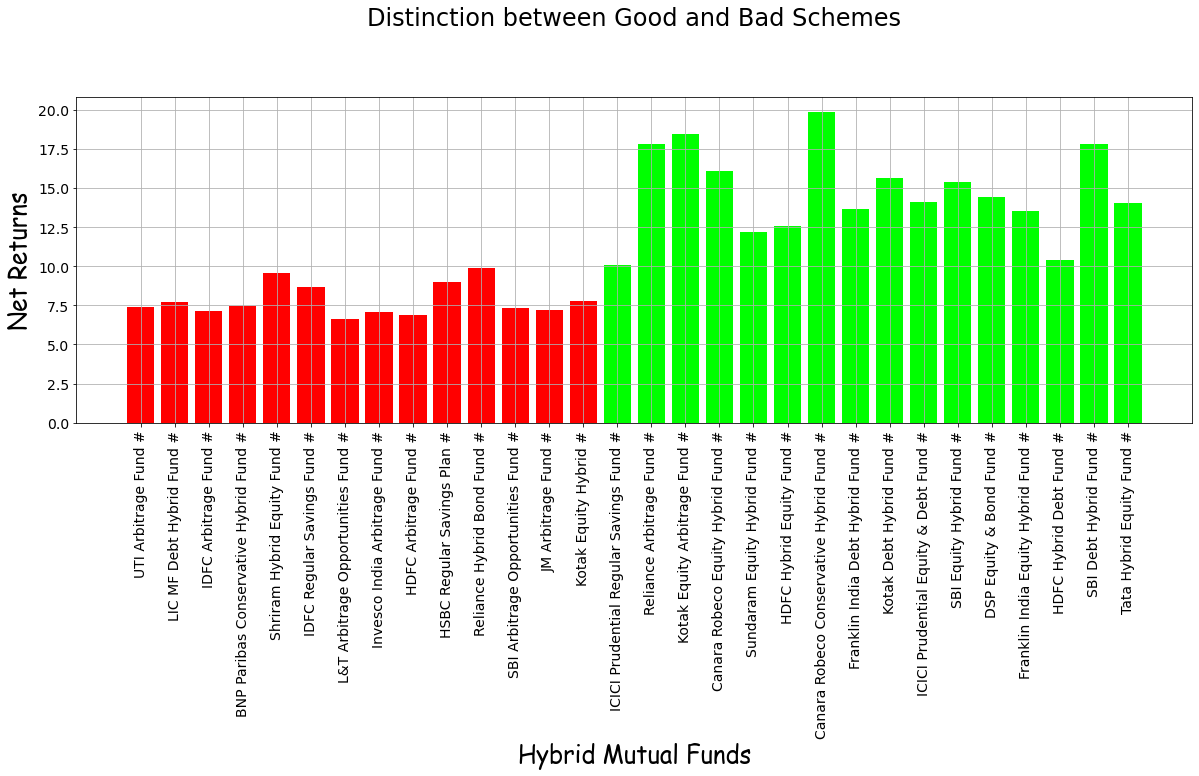

In [47]:
X = data['Fund_Scheme_Name']
Y = data['Net_Return']

mask1 = Y < 10.0
mask2 = Y >= 10.0

plt.bar(X[mask1], Y[mask1], color = 'red')
plt.bar(X[mask2], Y[mask2], color = 'lime')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Net Returns', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

#### Good schemes are filtered out based on condition where Net reurns value > 10 indicated in green color and rest in red color which are not considered as good schemes.

#### 3) Based on Beta value:

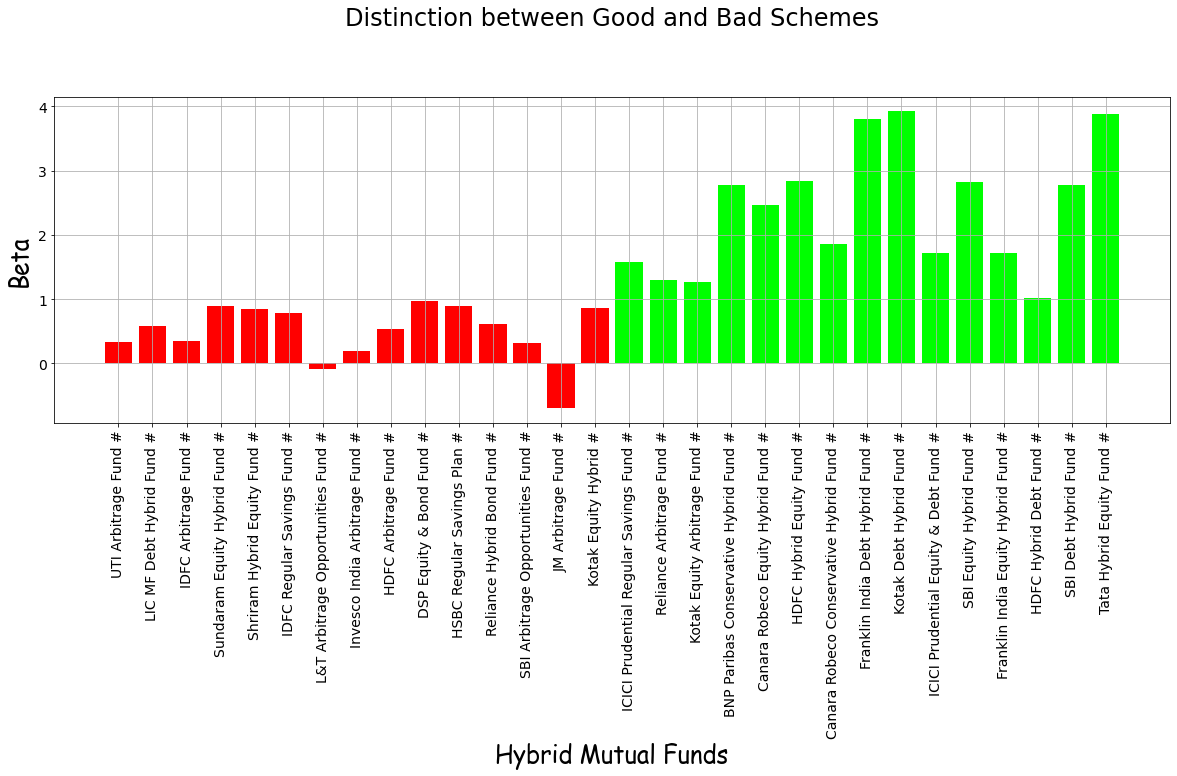

In [48]:
X = data['Fund_Scheme_Name']
Y = data['Beta']

mask1 = Y < 1.0
mask2 = Y >= 1.0

plt.bar(X[mask1], Y[mask1], color = 'red')
plt.bar(X[mask2], Y[mask2], color = 'lime')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Beta', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

#### Good schemes are filtered out based on condition where Beta value > 1 indicated in green color and rest in red color which are not considered as good schemes.

#### 4) Based on alpha value:

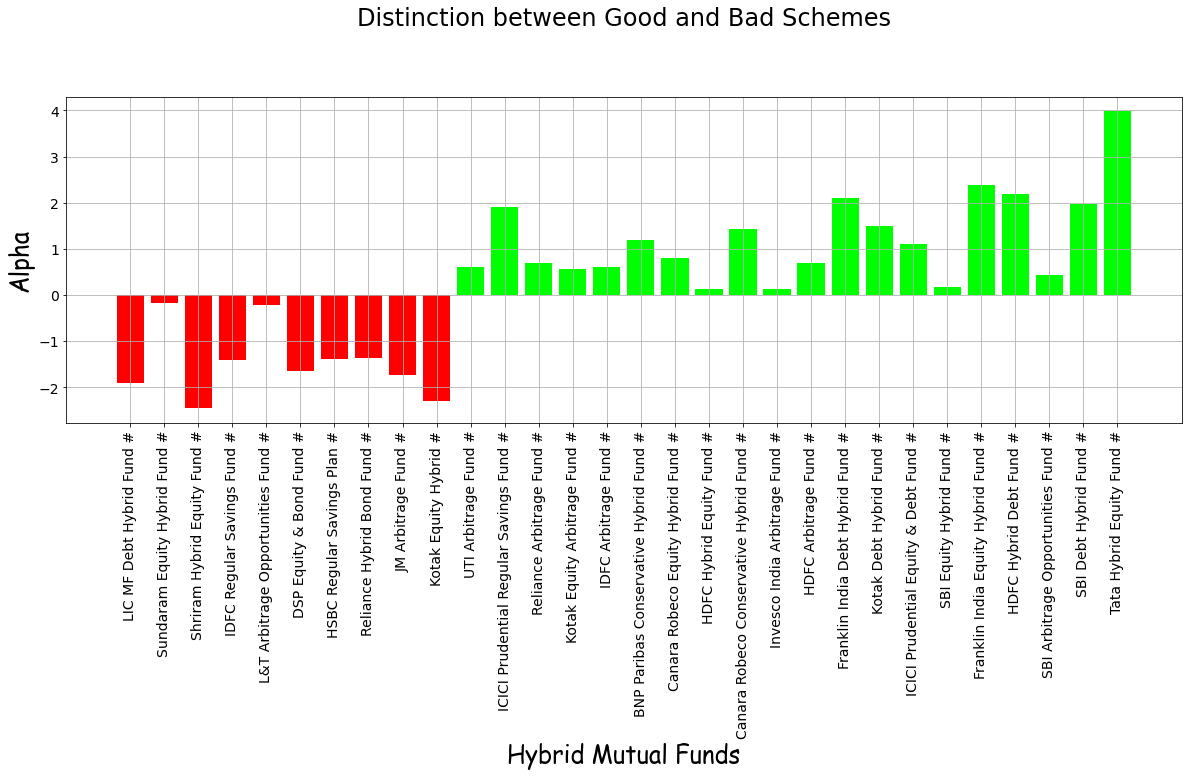

In [49]:
X = data['Fund_Scheme_Name']
Y = data['Alpha']

mask1 = Y < 0.0
mask2 = Y >= 0.0

plt.bar(X[mask1], Y[mask1], color = 'red')
plt.bar(X[mask2], Y[mask2], color = 'lime')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Alpha', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

#### Good schemes are filtered out based on condition where Alpha value > 0 indicated in green color and rest in red color which are not considered as good schemes.

#### 5) Based on sharp ratio:

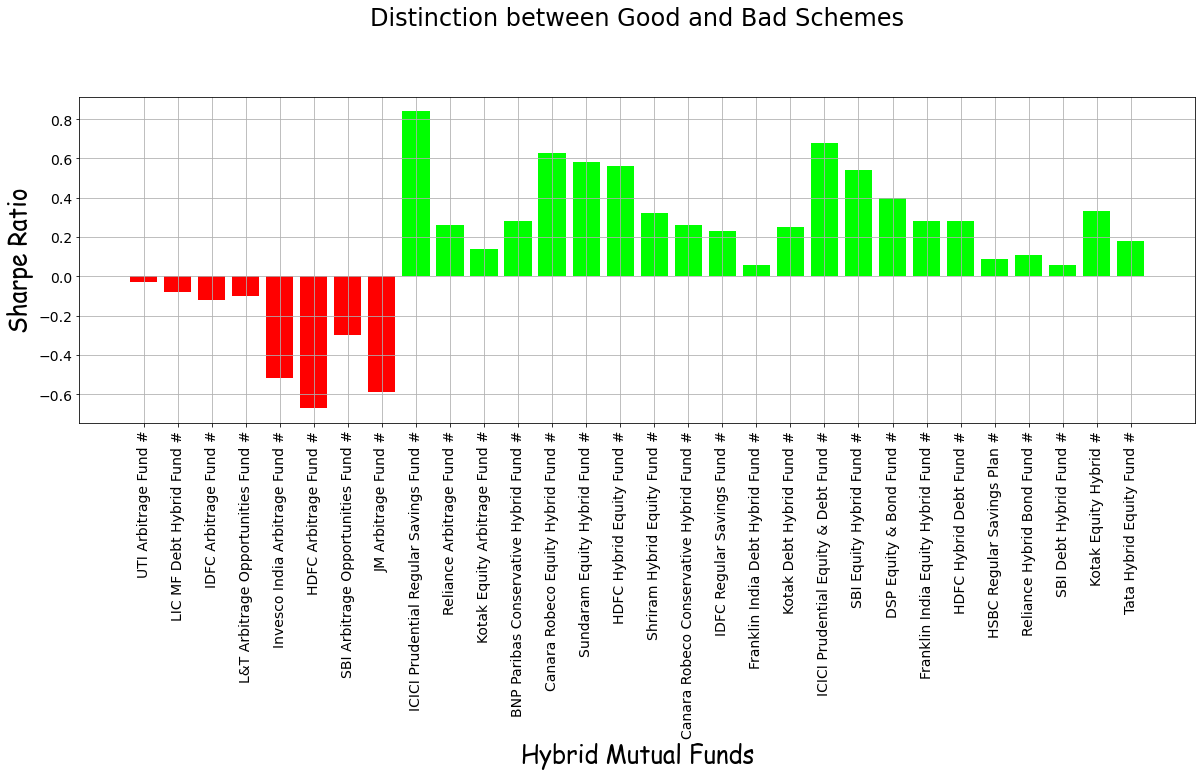

In [50]:
X = data['Fund_Scheme_Name']
Y = data['Sharpe_Ratio']

mask1 = Y < 0.0
mask2 = Y >= 0.0

plt.bar(X[mask1], Y[mask1], color = 'red')
plt.bar(X[mask2], Y[mask2], color = 'lime')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Sharpe Ratio', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

#### Good schemes are filtered out based on condition where Sharpe ratio value > 0 indicated in green color and rest in red color which are not considered as good schemes.

#### 6) Based on Standard deviation:

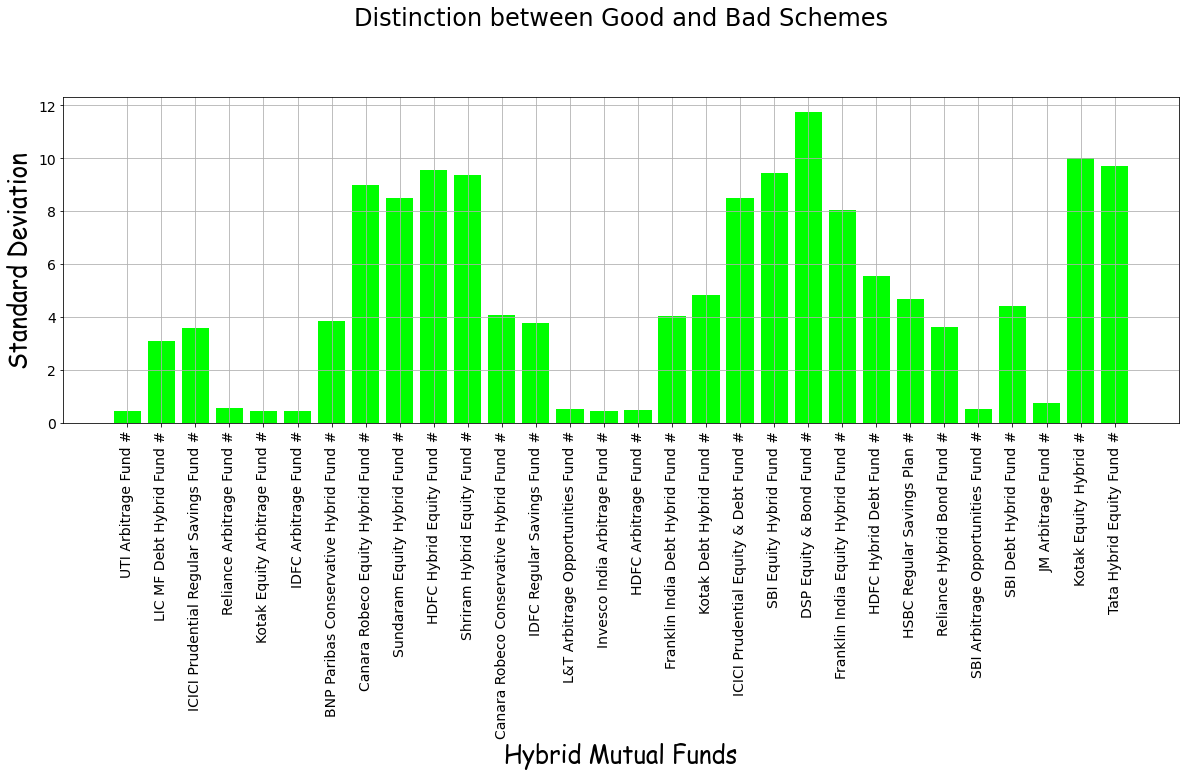

In [51]:
X = data['Fund_Scheme_Name']
Y = data['Std_Dev']

mask1 = Y < 15.0
mask2 = Y >= 15.0

plt.bar(X[mask1], Y[mask1], color = 'lime')
plt.bar(X[mask2], Y[mask2], color = 'red')
plt.xlabel('Hybrid Mutual Funds', fontsize=24, fontname="Comic Sans MS")
plt.ylabel('Standard Deviation', fontsize=24, fontname="Comic Sans MS" )
plt.grid()
plt.title('Distinction between Good and Bad Schemes', y=1.20, fontsize='24')
plt.xticks(X, rotation='vertical')
plt.rcParams['figure.figsize']=(20,6)
plt.rcParams['font.size'] = 14
plt.show()

#### Good schemes are filtered out based on condition where Standard deviation < 15 indicated in green color and rest in red color which are not considered as good schemes.

In [52]:
# Filtering good and bad based on above conditions

for index, row in data.iterrows():
    A=row['Fund_Scheme_Name']
    B=row['R_Squared']
    C=row['Net_Return']
    D=row['Beta']
    E=row['Alpha']
    F=row['Sharpe_Ratio']
    G=row['Std_Dev']
     
    if (B>=85 and C>=10 and D>=1 and E>0 and F>0 and G<15):     
        print(A)
        data.loc[index, 'Good'] = 1
    else:
        data.loc[index, 'Good'] = 0

ICICI Prudential Regular Savings Fund #
Reliance Arbitrage Fund #
Kotak Equity Arbitrage Fund #
Canara Robeco Equity Hybrid Fund #
HDFC Hybrid Equity Fund #
Canara Robeco Conservative Hybrid Fund #
Franklin India Debt Hybrid Fund #
Kotak Debt Hybrid Fund #
ICICI Prudential Equity & Debt Fund #
SBI Equity Hybrid Fund #
Franklin India Equity Hybrid Fund #
HDFC Hybrid Debt Fund #
SBI Debt Hybrid Fund #
Tata Hybrid Equity Fund #


In [53]:
data.head()  #good coloumn added

Unnamed: 0  Sl_No.                         Fund_Scheme_Name       Category  \
0           0       1                     UTI Arbitrage Fund #      Arbitrage   
1           1       2                LIC MF Debt Hybrid Fund #  Conservative    
2           2       3  ICICI Prudential Regular Savings Fund #  Conservative    
3           3       4                Reliance Arbitrage Fund #      Arbitrage   
4           4       5            Kotak Equity Arbitrage Fund #      Arbitrage   

  Launch_Date Crisil_Rating  Net_Assets_(Cr)  1_Yr_Return  3_Yr_Return  \
0  2006-06-29        Rank 1          1397.70         6.52         6.24   
1  2003-06-02        Rank 1            84.93         7.68         5.92   
2  2004-03-30        Rank 1          1589.42         8.40         9.33   
3  2010-10-14        Rank 2          8535.00         6.64         6.41   
4  2005-09-29        Rank 2         13360.00         6.56         6.32   

   5_Yr_Return  ... Expense_Ratio  Sharpe_Ratio  Sortino_Ratio  Alpha  Beta  \
0         6.60  ...          0.83         -0.03          -0.04   0.60  0.33   
1         6.55  ...          2.30         -0.08          -0.12  -1.91  0.58   
2         9.92  ...          2.24          0.84           1.36   1.91  1.58   
3         6.86  ...          1.04          0.26           0.45   0.70  1.30   
4         6.75  ...          0.97          0.14           0.23   0.56  1.26   

   Std_Dev  R_Squared  Year_Trailing  Net_Return  Good  
0     0.45       0.00             13        7.40     0  
1     3.07      62.19             16        7.73     0  
2     3.57      88.45             15       10.06     1  
3     0.54      85.00              8       17.83     1  
4     0.45      87.45             13       18.45     1  

[5 rows x 21 columns]

In [54]:
category=data['Good'].unique().tolist()
# converin categories to list
category_frequency = data['Good'].value_counts().to_dict()
# converting category_frequency to dictionary

count = category_frequency.values()
#print(count)

def getList(category_frequency): 
    list = [] 
    for value in category_frequency.values(): 
        list.append(value) 
          
    return list          # returns list
      
category_count=getList(category_frequency)

### Percentage of Good and Bad schemes:

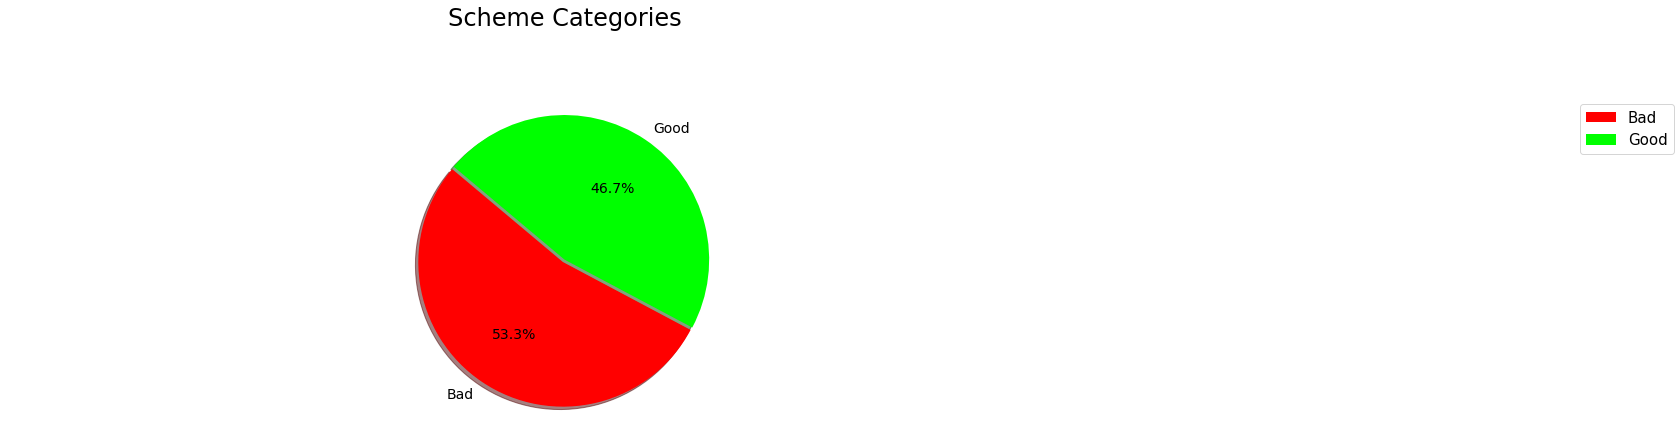

In [55]:
labels = ['Bad', 'Good']
colors = ['red', 'lime']
explode = (0.01, 0.01)  


plt.pie(category_count, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct='%1.1f%%')
plt.title('Scheme Categories', y=1.20, fontsize='24')
plt.legend(labels,loc='upper right', bbox_to_anchor=(1.5,1.0), fontsize=15)
plt.axis('equal')
plt.rcParams['figure.figsize']=(6,6)
plt.rcParams['font.size'] = 20
plt.show()

#### 53.3% of the schemes are bad!